# TP Integrador análisis de datos:

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado. Trabajaremos con un dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia. El objetivo es predecir si lloverá o no al día siguiente (variable RainTomorrow), en función datos metereológicos del día actual.

### Dataset: 
El dataset weatherAUS es un dataset que contiene más de 140 mil observaciones climatológicas de estaciones meteorológicas en el territorio australiano, el data set contiene las siguientes variables:

* **Date:** Fecha de la observación.
* **Location:** Nombre de la estación metereológica.
* **MinTemp:** Temperatura minima en grados Celsius.
* **MaxTemp:** Temperatura máxima en grados Celsius.
* **RainFall:** Cantidad de lluvia en mm.
* **Evaporation:** Evaporación de agua durante el día en mm.
* **Sunshine:** Número de horas de luz solar durante el día.
* **WindGustDir:** Dirección de la ráfaga de viento más fuerte durante el día.
* **WindGustSpeed:** Velocidad en (km/h) de la ráfaga de viento más fuerte durante el día.
* **WindDir9am:** Dirección del viento a kas 9 am.
* **WindDir3pm:** Dirección del viento a kas 3 pm.
* **WindSpeed9am:** Velocidad en (km/h) del viento a las 9 am.
* **WindSpeed3pm:** Velocidad en (km/h) del viento a las 3 pm.
* **Humidity9am:** Humedad relativa en porcentaje a las 9 am.
* **Humidity3pm:** Humedad relativa en porcentaje a las 3 pm.
* **Pressure9am:** Presión atmosférica (mmHg) a las 9 am.
* **Pressure3pm:** Presión atmosférica (mmHg) a las 3 pm.
* **Cloud9am:** Nivel de nubosidad (escala Octa) a las 9 am.
* **Cloud3pm:** Nivel de nubosidad (escala Octa) a las 3 pm.
* **Temp9am:** Temperatura medida a las 9 am en grados Celsius.
* **Temp3pm:** Temperatura medida a las 3 pm en grados Celsius.
* **RainToday:** 1 si el día de la medición llovía y 0 en otro caso.
* **RainTomorrow:** 1 si el día posterior a la medición llovía y 0 en otro caso.



#  1. Análisis exploratorio inicial:

In [463]:
# Importamos librerías:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics.pairwise import nan_euclidean_distances

#Transformaciones:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler, scale

#Estadisticos:
from scipy.stats import ks_2samp

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

sns.set_theme()

In [446]:
df = pd.read_csv("weatherAUS.csv", parse_dates=["Date"])

In [289]:
df.shape

(145460, 23)

In [290]:
#Visualizar las primeras filas
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [291]:
# Identificar los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [292]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Observaciones:
* 145460 registros.
* 23 variables de entrada.
* De las 23 variables de entrada existen 14 variables númericas y 9 categóricas.
* La variable RainTomorrow es la variable de salida.
* Todas las columnas salvo Date y Location tienen valores faltantes.
* La variable de salida RainTomorrow tiene 3267 valores faltantes.

In [275]:
# Realizar un resumen de 5 números. 
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  
count  88536.000000  85099.000000  141289.000000  139467.000000  
mean       4.437189      4.503167      16.987509      21.687235  
std        2.887016      2.720633       6.492838       6.937594  
min        0.000000      0.000000      -7.200000      -5.400000  
25%        1.000000      2.000000      12.300000      16.600000  
50%        5.000000      5.000000      16.700000      21.100000  
75%        7.000000      7.000000      21.600000      26.400000  
max        9.000000      9.000000      40.200000      46.700000

## Análisis de variables númericas de entrada:

* MinTemp
* MaxTemp
* Temp9am
* Temp3pm
* Pressure9am
* Pressure3pm
* Rainfall
* Evaporation
* Sunshine
* WindGustSpeed
* WindSpeed9am
* WindSpeed3pm
* Humidity9am
* Humidity3pm

In [276]:
def display_dataset_distributions (df, features):
    for col in features:
        df_aux = df[df[col].notnull()][col]
        plt.figure(figsize=(15,4))
        plt.subplot(131)
        sns.histplot(data=df_aux,kde=True, label="skew: " + str(np.round(df_aux.skew(),2)))
        plt.legend()
        plt.subplot(132)
        sns.boxplot(x=df[col])
        plt.subplot(133)
        stats.probplot(df_aux, plot=plt)
        plt.tight_layout()
        plt.show()

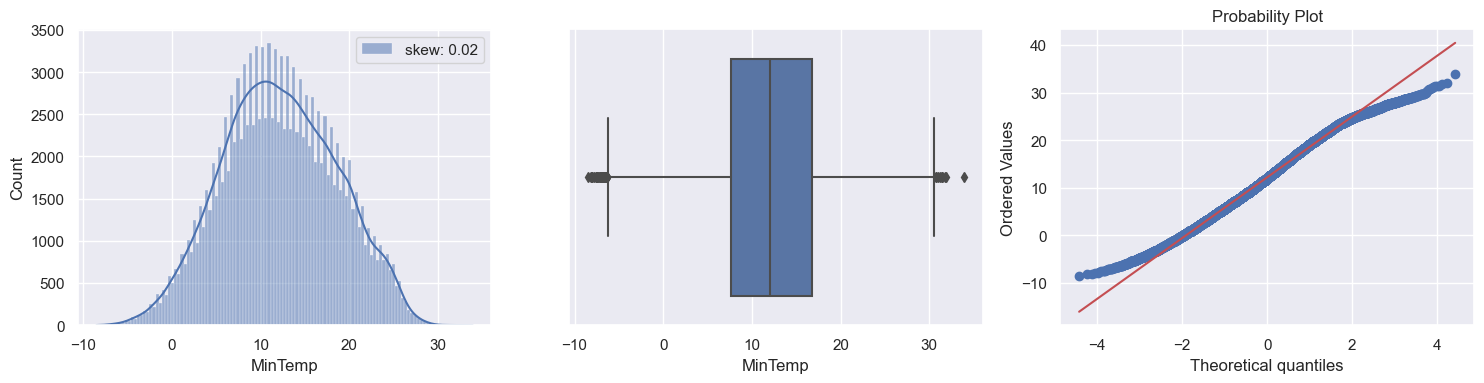

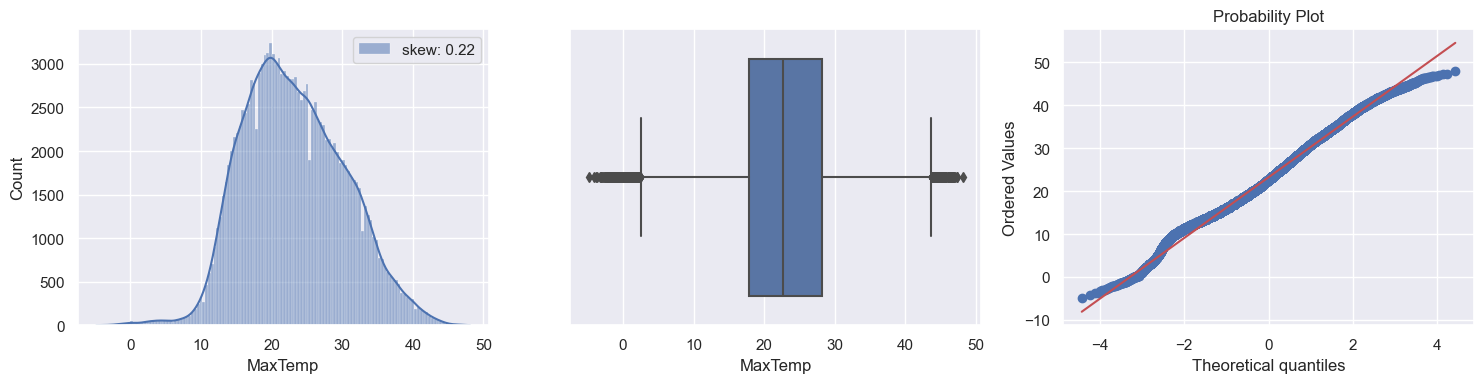

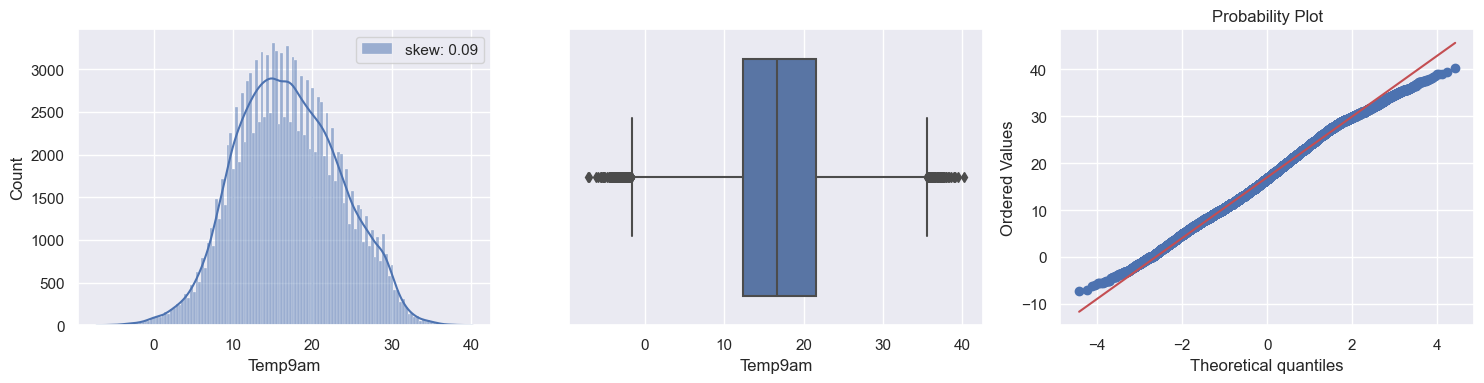

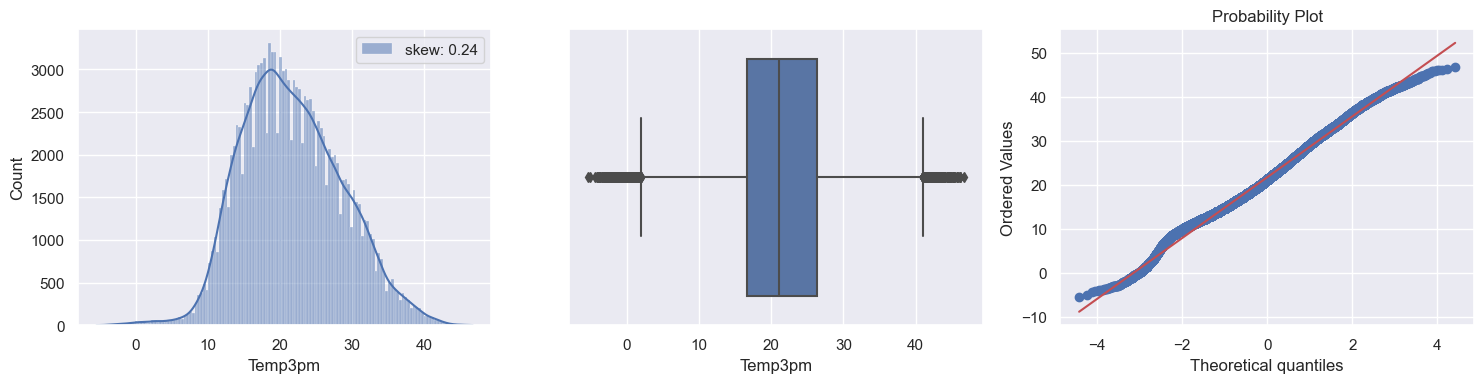

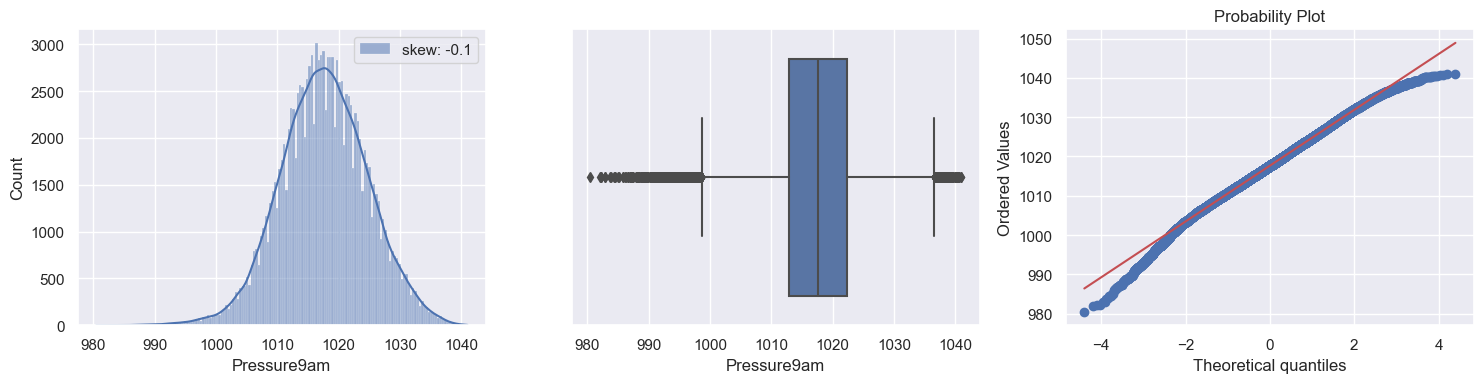

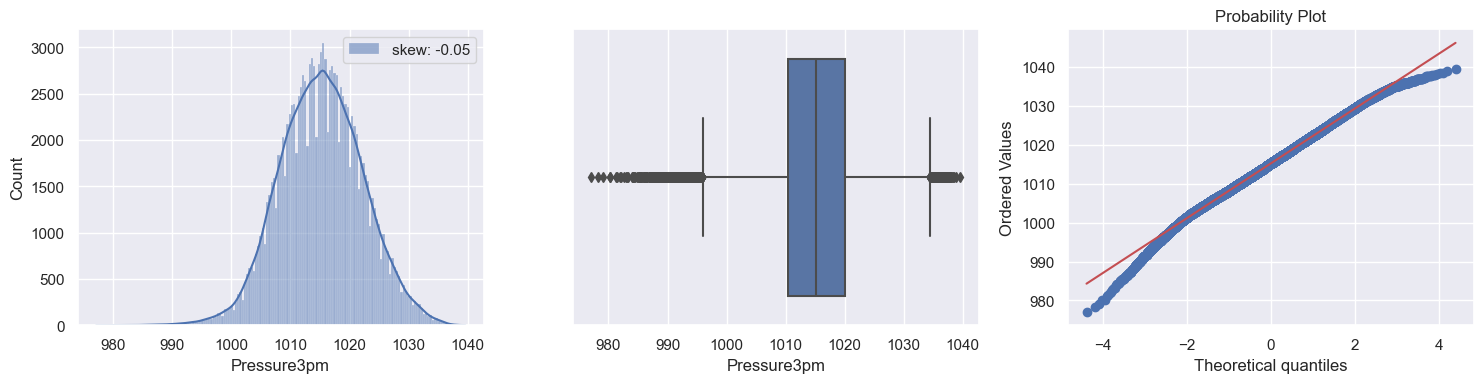

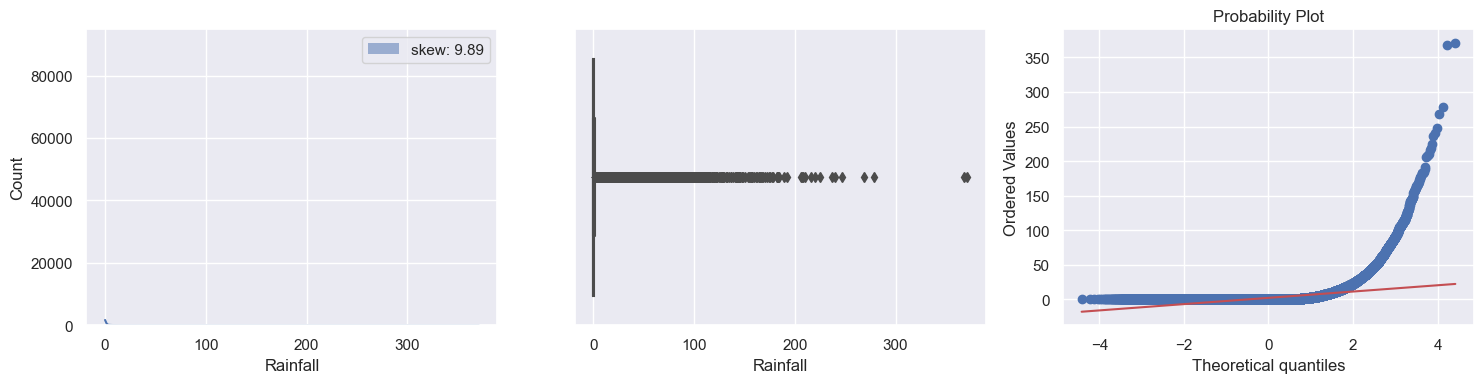

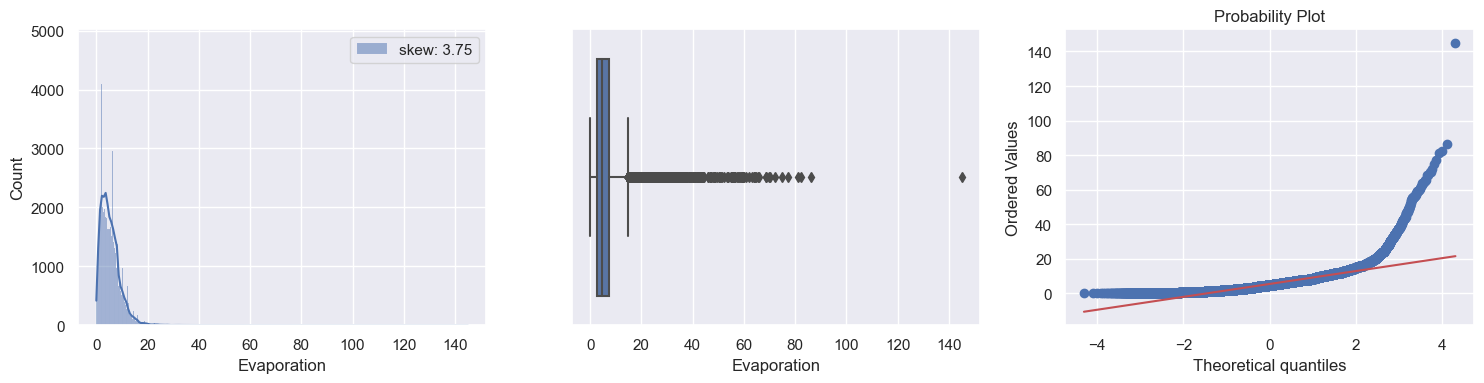

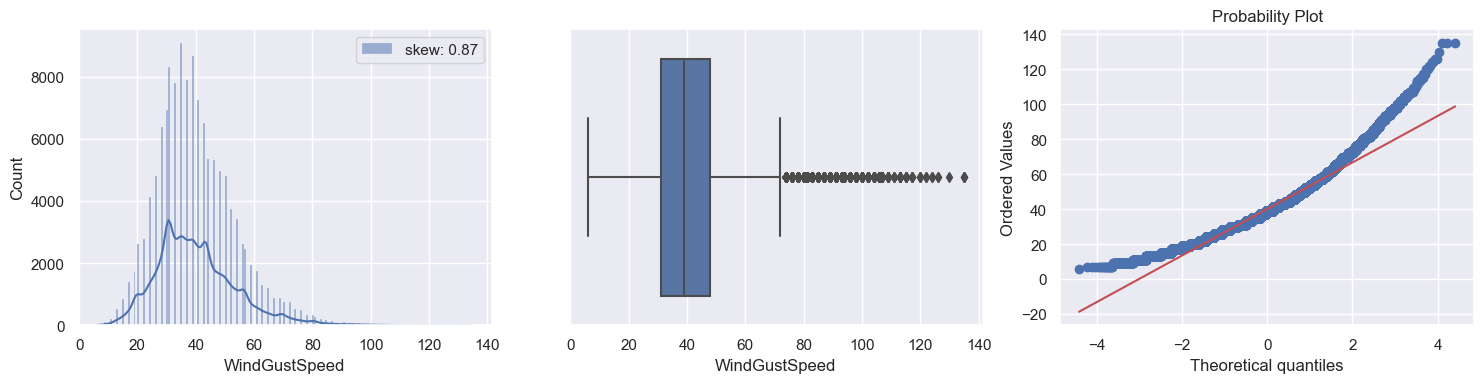

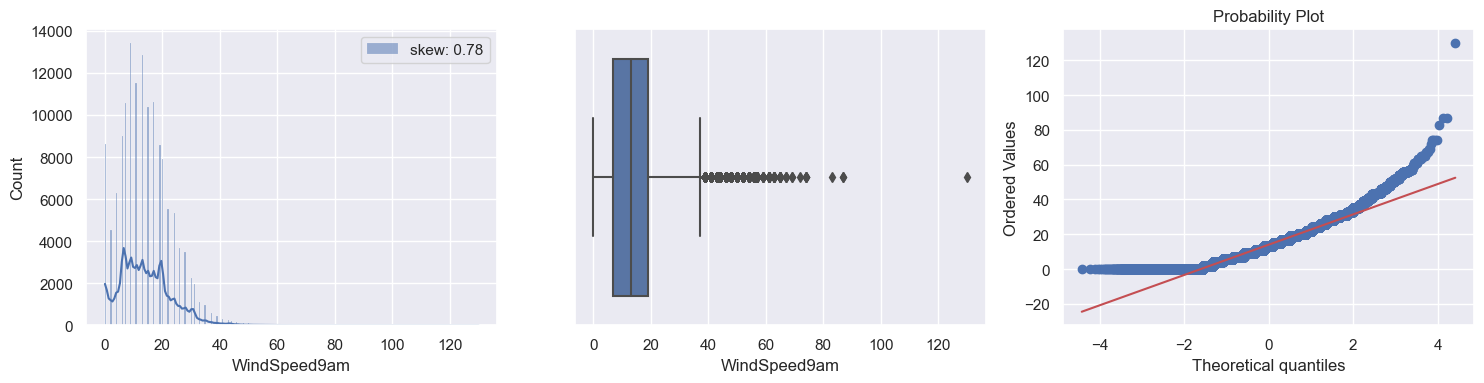

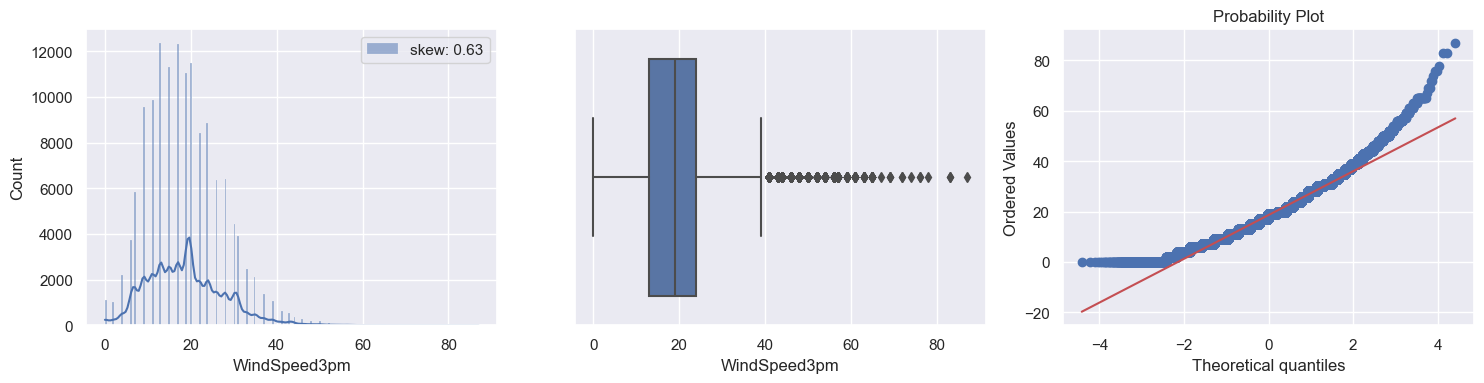

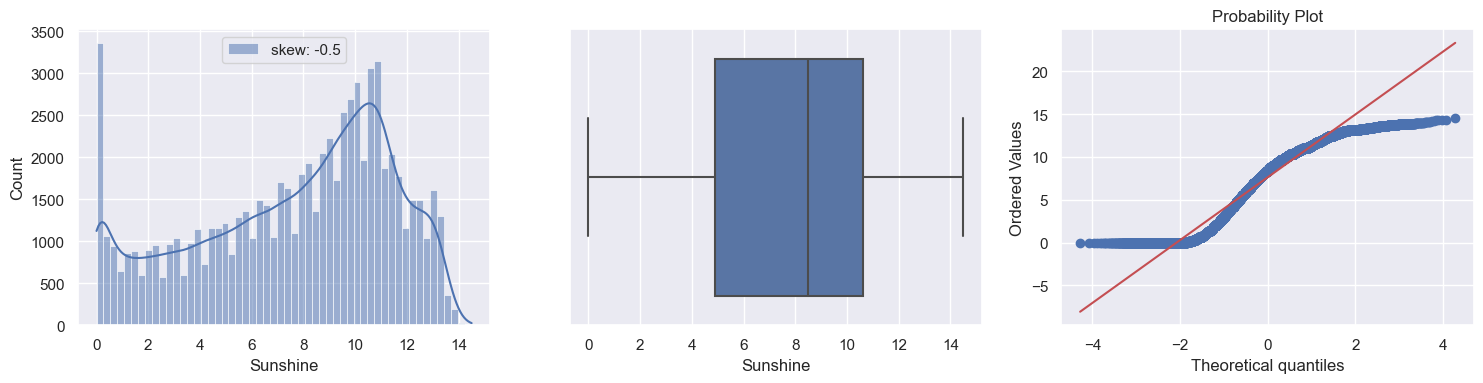

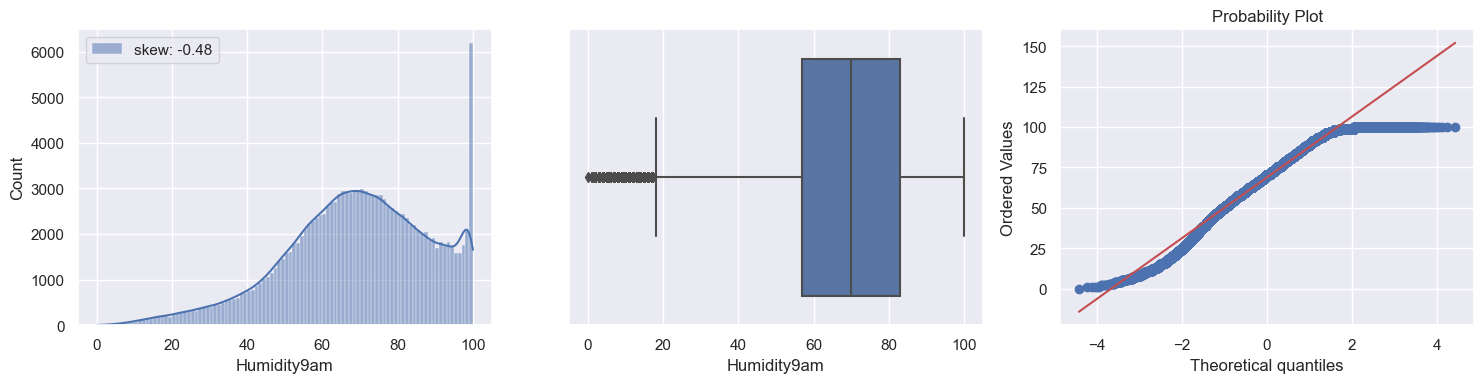

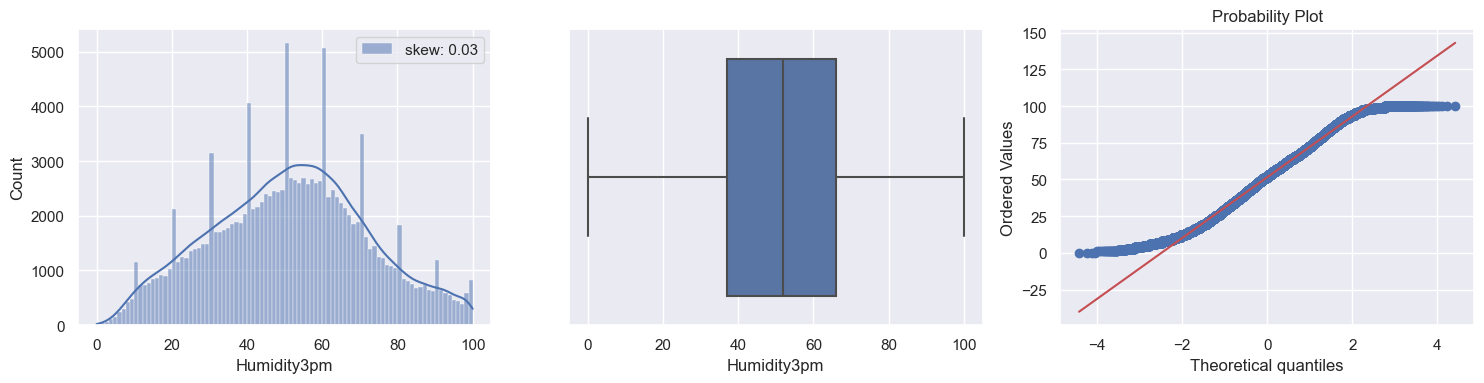

In [277]:
features = ["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Sunshine", "Humidity9am", "Humidity3pm"]
display_dataset_distributions (df, features)

**Observaciones:**
* El valor de skew para las variables MinTemp, MaxTemp, Temp9am, Temp3pm, Pressure9am y Pressure3pm es bastante bajo.
* El gráfico Q-Q plot muestra que las variables, MinTemp, MaxTemp, Temp9am, Temp3pm, Pressure9am y Pressure3pm podrían asumirse con distribución normal, sin embargo se observa que las colas se separan bastante. Es probable que existan outliers en ambos lados de las colas.
* Las variable Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Sunshine, Humidity9am, Humidity3pm no muestran una distribución normal.

In [278]:
def display_dataset_distributions_transf (df, features, qt):
    for col in features:
        df_aux = df[df[col].notnull()][col].to_numpy()
        df_aux = df_aux.reshape((len(df_aux),1))
        df_aux = qt.fit(df_aux).transform(df_aux)
        df_aux.reshape((1,-1))[0]

        fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15, 4))
        sns.histplot(data=df_aux,kde=True, ax=axs[0])

        axs[0].set_ylabel('Count')
        fig.suptitle(col, fontsize=12)

        sns.boxplot(x=df_aux, ax=axs[1])
        stats.probplot(df_aux.reshape((1,-1))[0], plot=axs[2])

        plt.show()

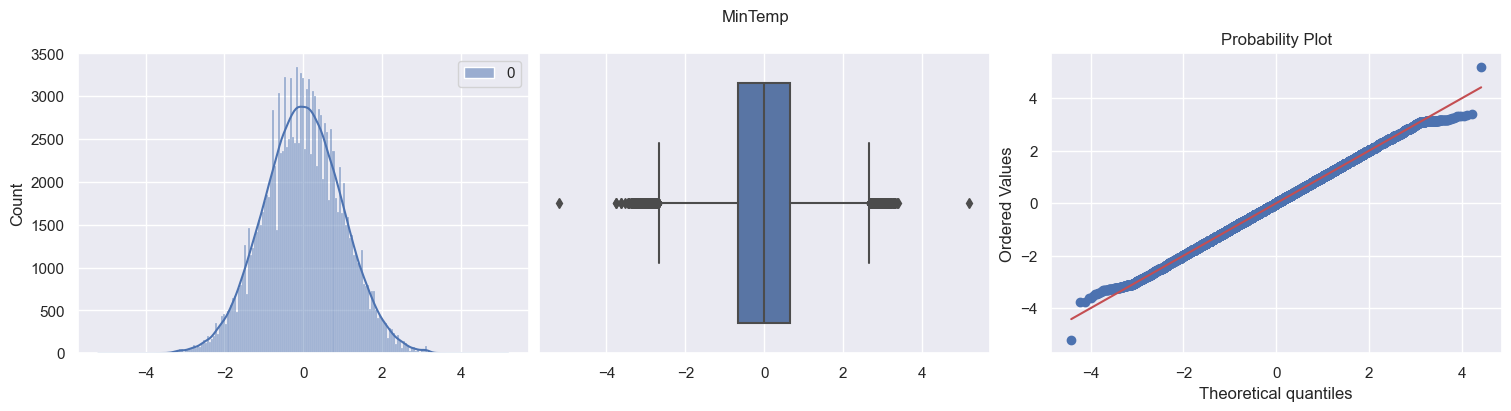

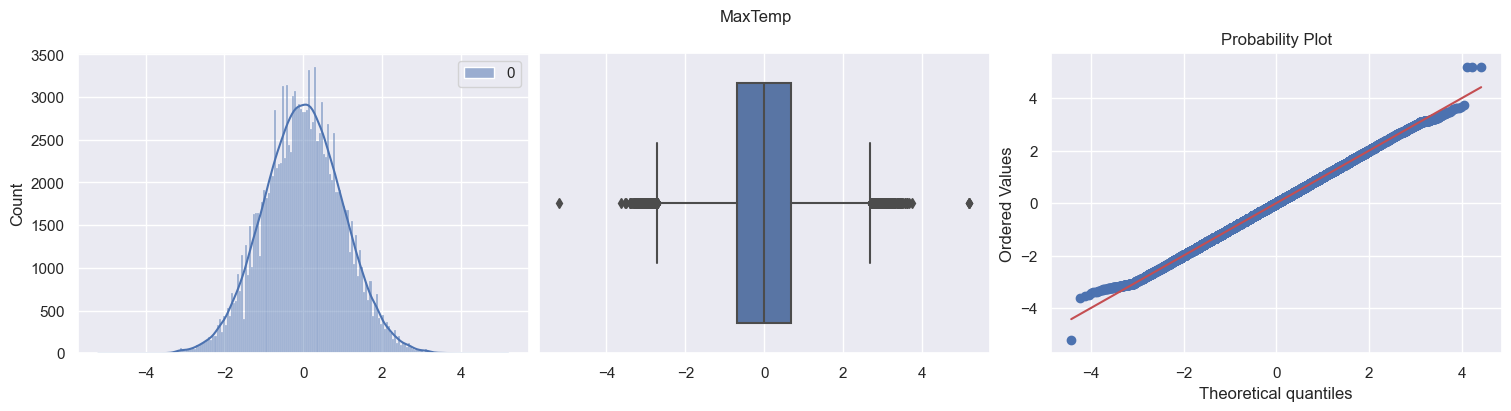

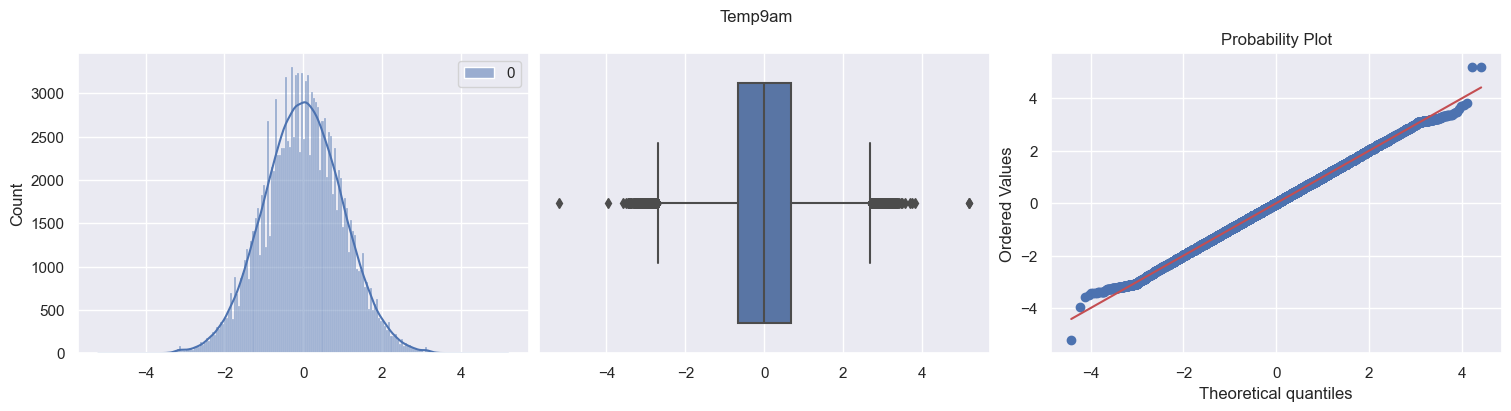

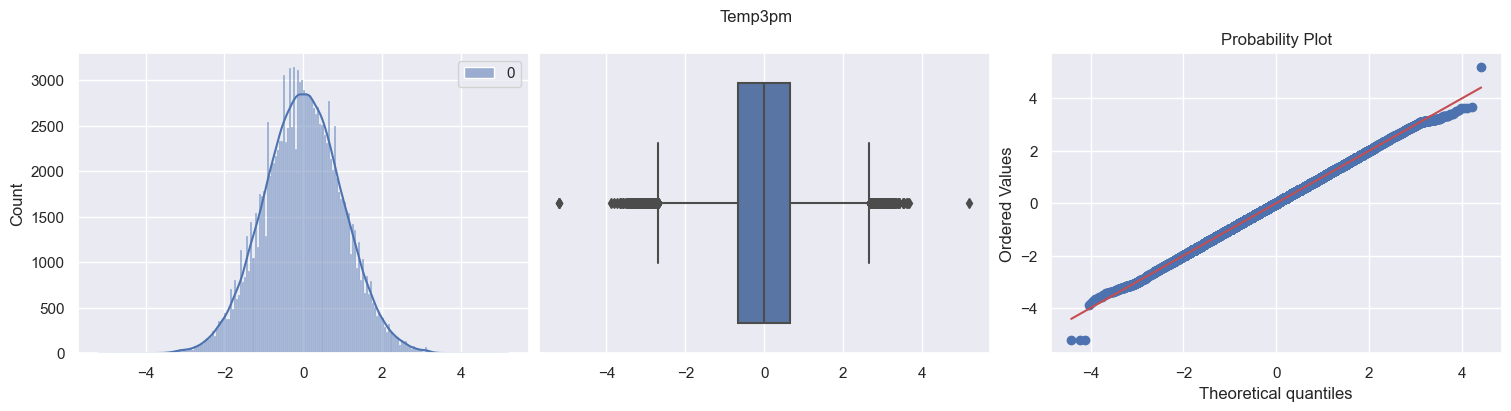

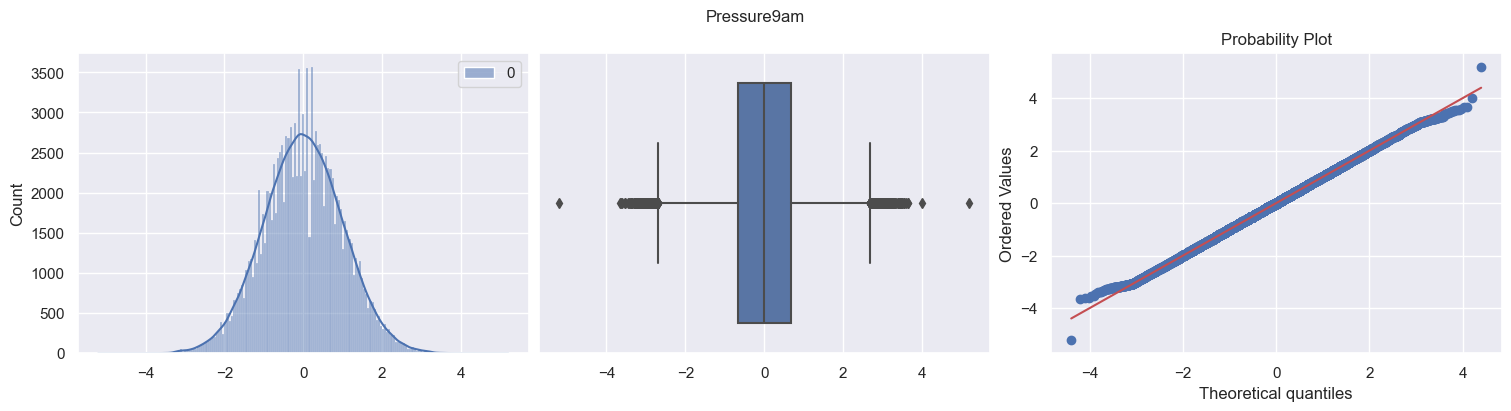

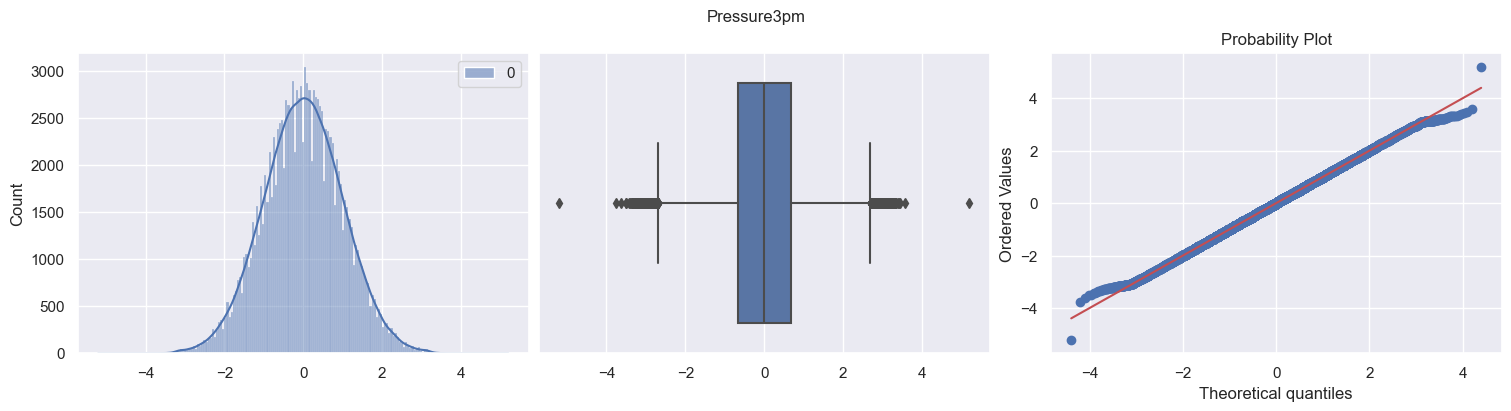

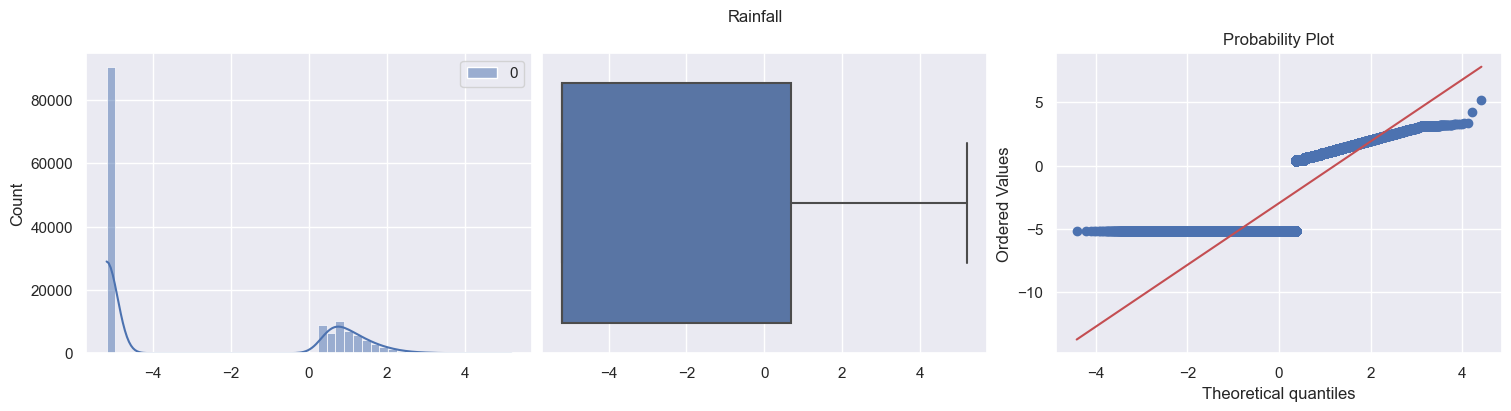

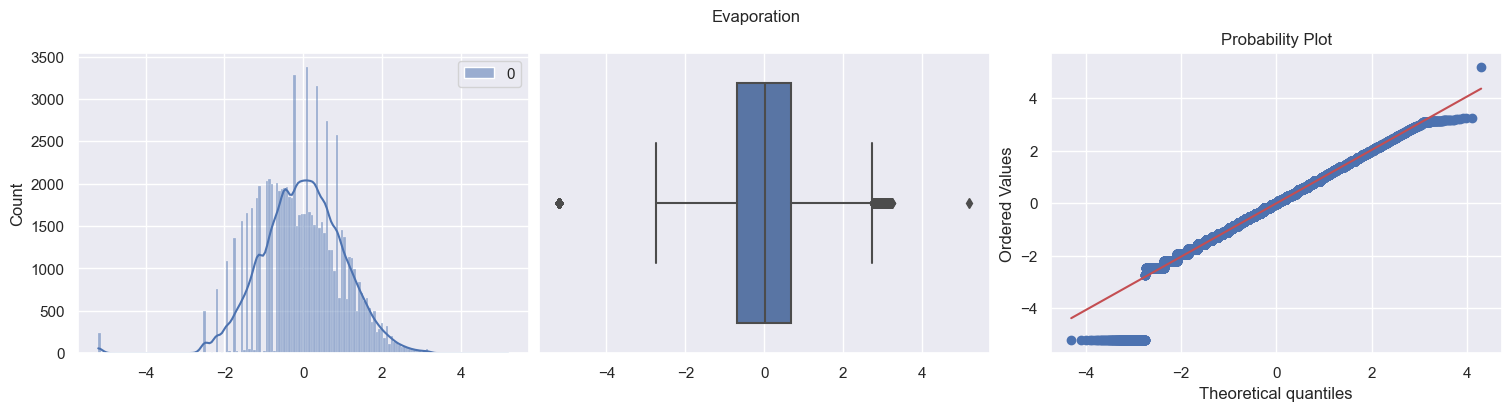

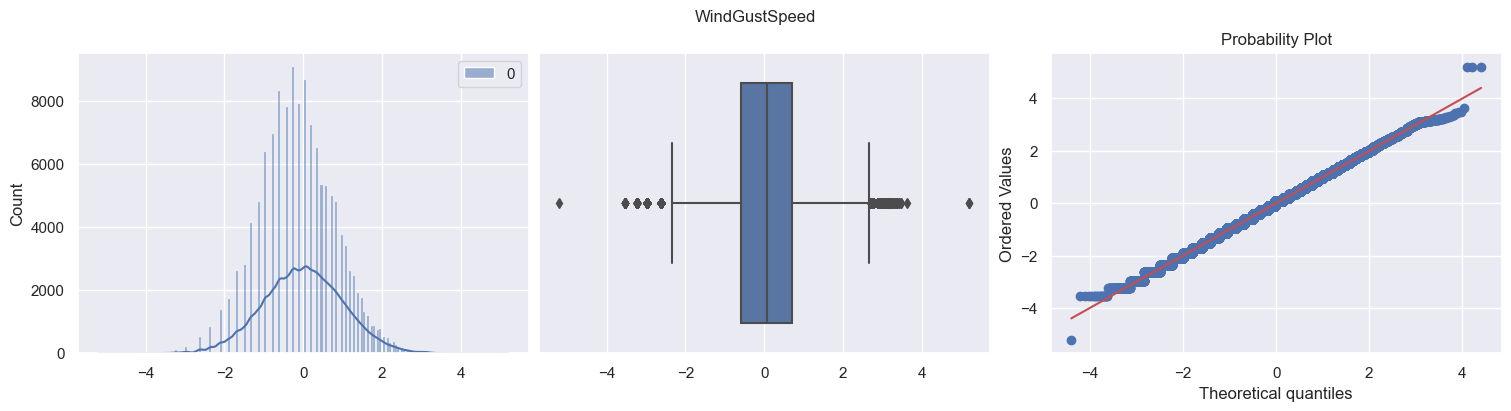

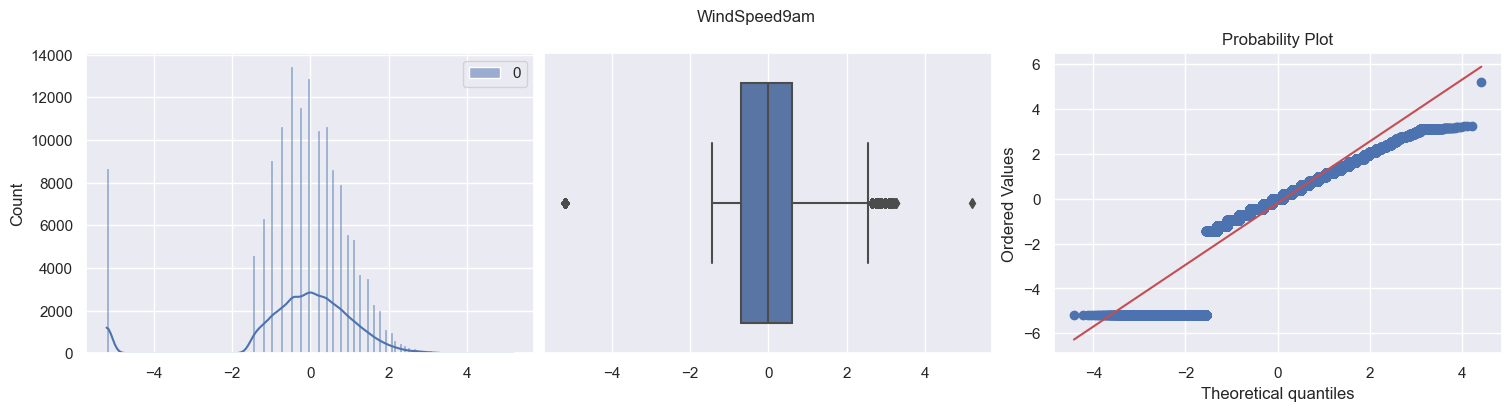

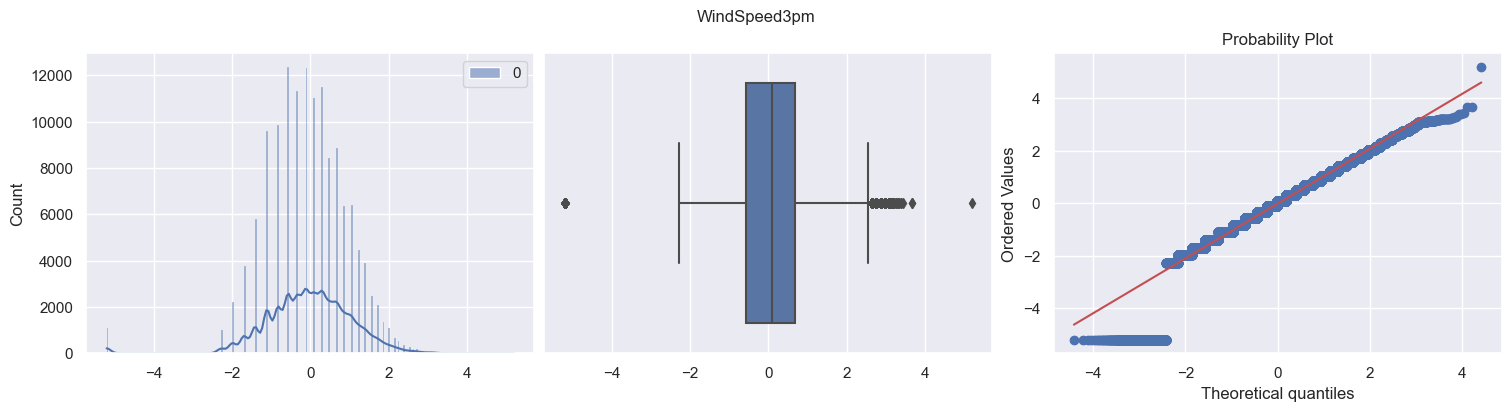

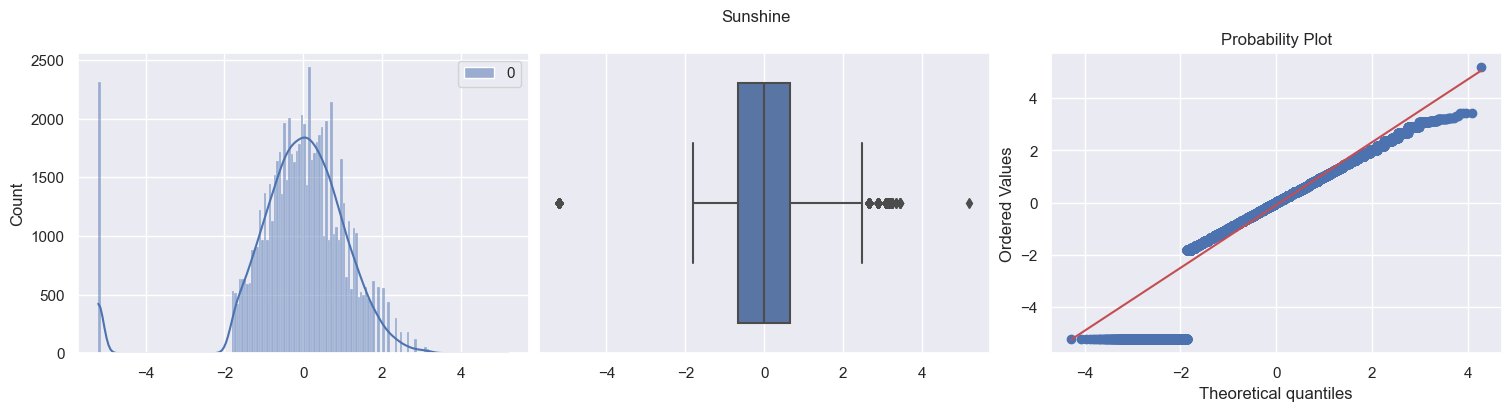

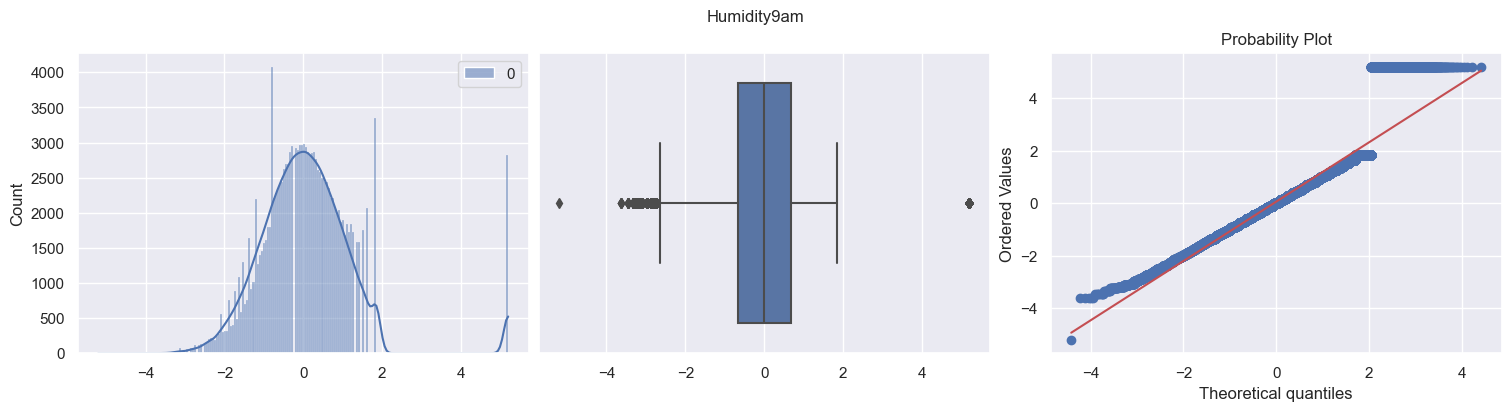

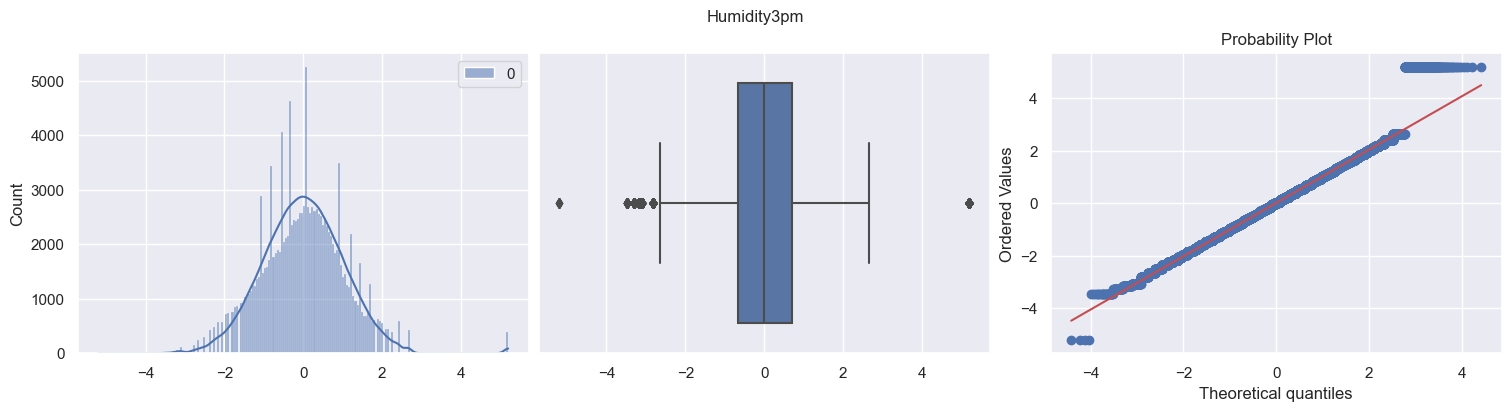

In [343]:
features = ["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Sunshine", "Humidity9am", "Humidity3pm"]
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)
display_dataset_distributions_transf (df, features, qt)

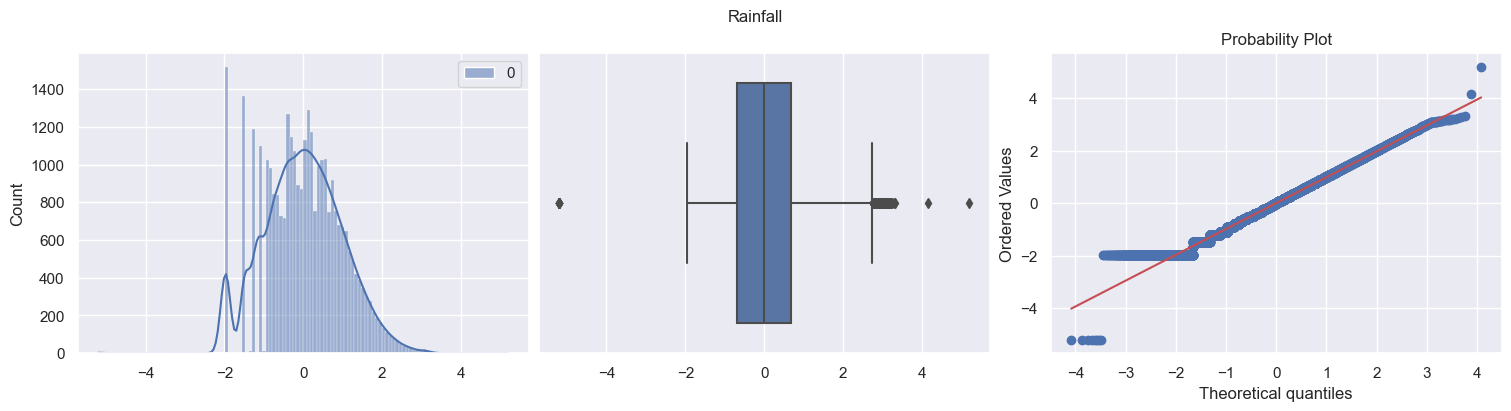

In [396]:
features = ["Rainfall"]
df_aux = df[df[features] >1 ]
#qt = PowerTransformer(method='yeo-johnson', standardize=True)
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)
display_dataset_distributions_transf (df_aux, features, qt)

## Análisis de outliers:

In [339]:
def busco_outliers(df, features):
    df_outliers = pd.DataFrame({'feature': [], 'outliers_livianos': [], 'outliers_pesados': []})
    for col in features:

        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        limite_inferior = df[col].quantile(0.25) - (IQR * 1.5)
        limite_superior = df[col].quantile(0.75) + (IQR * 1.5)
        outliers_ligeros = sum((df[col] > limite_superior) | (df[col] < limite_inferior))

        limite_inferior = df[col].quantile(0.25) - (IQR * 3)
        limite_superior = df[col].quantile(0.75) + (IQR * 3)
        outliers_pesados = sum((df[col] > limite_superior) | (df[col] < limite_inferior))
        df_outliers = df_outliers.append({'feature': col, 'outliers_livianos': outliers_ligeros, 'outliers_pesados': outliers_pesados}, ignore_index=True)
    return df_outliers
  

In [340]:
features = ["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm"]
busco_outliers(df, features)

feature  outliers_livianos  outliers_pesados
0         MinTemp               62.0               0.0
1         MaxTemp              459.0               0.0
2         Temp9am              247.0               0.0
3         Temp3pm              735.0               0.0
4     Pressure9am             1174.0               8.0
5     Pressure3pm              906.0               7.0
6        Rainfall            25228.0           20462.0
7     Evaporation             1954.0             471.0
8        Sunshine                0.0               0.0
9   WindGustSpeed             3006.0             150.0
10   WindSpeed9am             1739.0             107.0
11   WindSpeed3pm             2458.0              81.0
12    Humidity9am             1419.0               0.0
13    Humidity3pm                0.0               0.0

## Análisis de correlación entre variables de entrada:

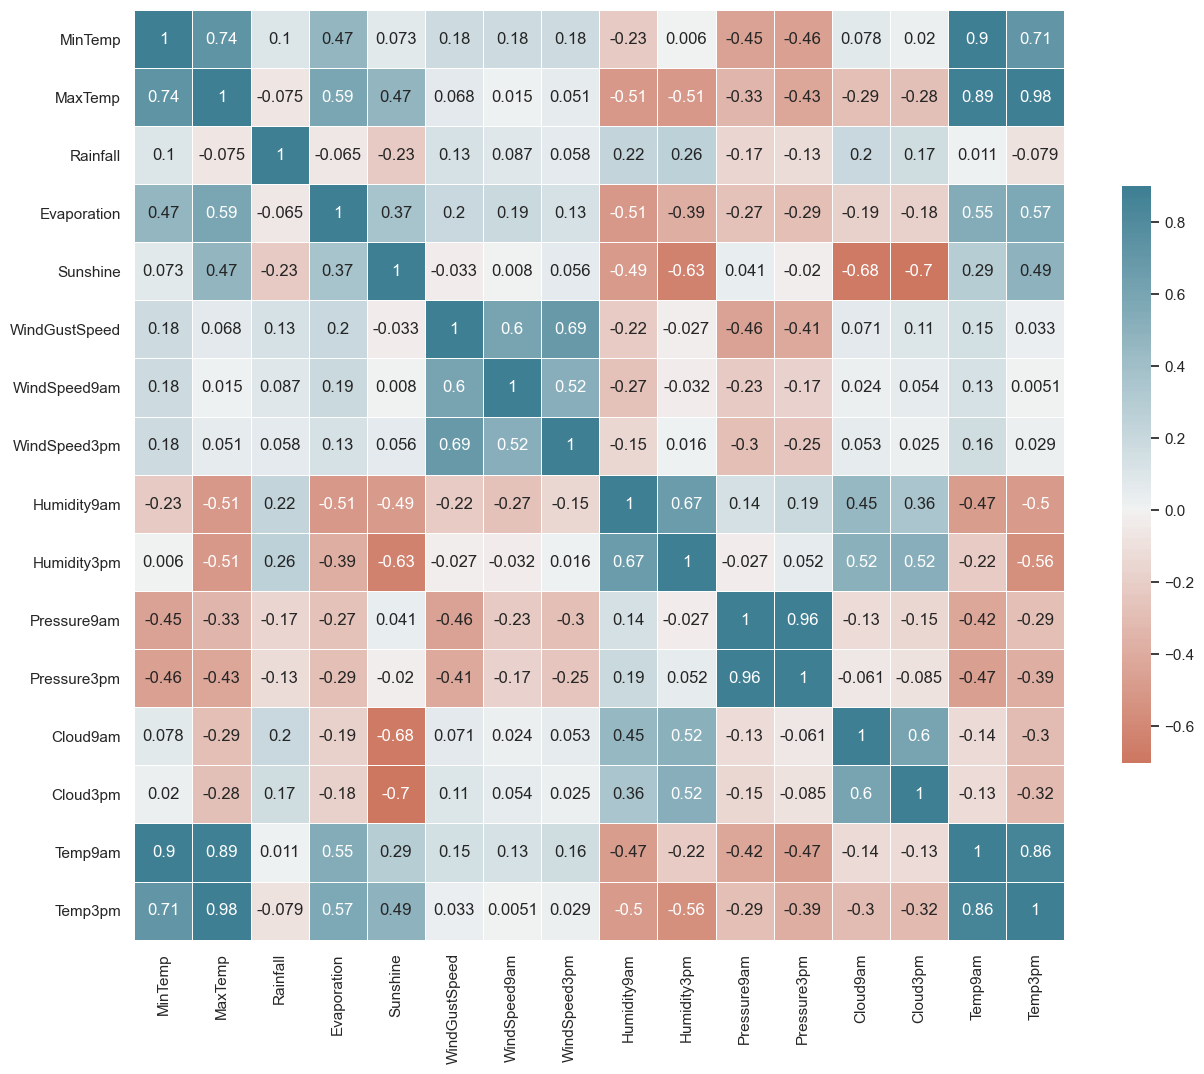

In [283]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), vmax=.9, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.show()

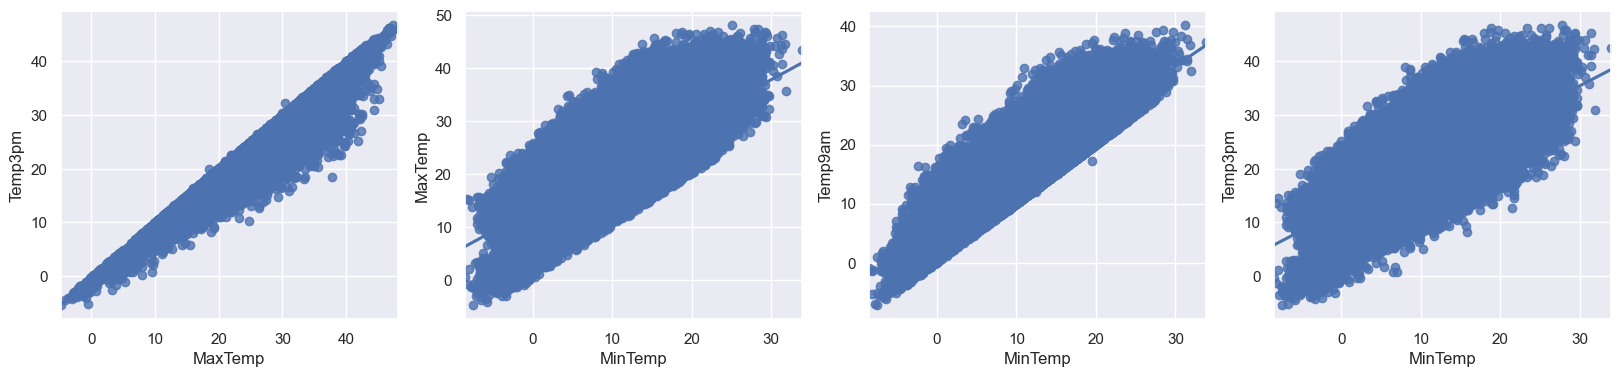

In [284]:
df_aux = qt.fit(df_aux).transform(df_aux)

fig,axes = plt.subplots(1,4,figsize=(20,4))
sns.regplot(x="MaxTemp", y="Temp3pm", data=df, order=1,ax=axes[0])
sns.regplot(x="MinTemp", y="MaxTemp", data=df, order=1,ax=axes[1])
sns.regplot(x="MinTemp", y="Temp9am", data=df, order=1,ax=axes[2])
sns.regplot(x="MinTemp", y="Temp3pm", data=df, order=1,ax=axes[3])
plt.show()

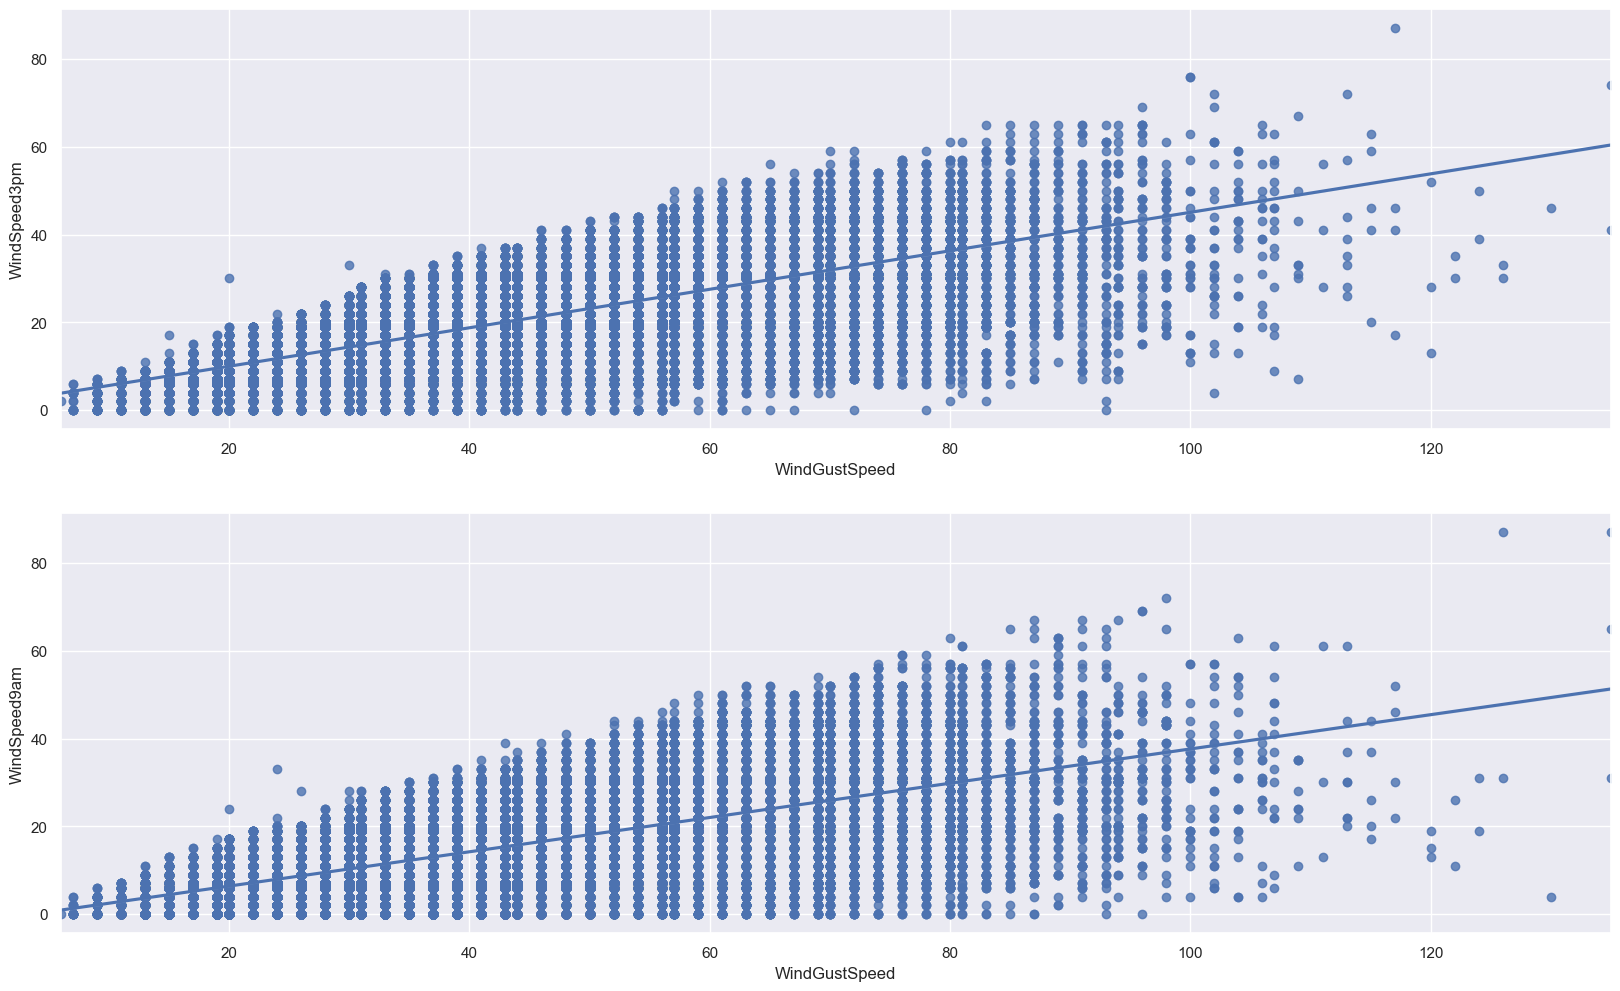

In [285]:
fig,axes = plt.subplots(2,1,figsize=(20,12))
sns.regplot(x="WindGustSpeed", y="WindSpeed3pm", data=df, order=1,ax=axes[0])
sns.regplot(x="WindGustSpeed", y="WindSpeed9am", data=df, order=1,ax=axes[1])
plt.show()

**Observaciones:**
* Existe una fuerte correlación entre las variables MinTemp, MaxTemp, Temp9am, Temp3pm.
* Existe una fuerte correlación entre las variables WindGustSpeed, WindSpeed3pm y WindSpeed9am.
* Exiset una fuerte correlación entre las variables Sunshine y las variablas Humidity3pm y Humidity9am.
* Exiset una fuerte correlación entre las variables Sunshine y las variablas Cloud9am y Cloud3pm.
* Existe una fuerta correlación entre las variables Pressure9am y Pressure3pm.

## Análisis de variables categóricas de entrada:
* Date           
* Location       
* WindGustDir
* WindDir9am 
* WindDir3pm    
* Cloud9am    
* Cloud3pm
* RainToday  
* RainTomorrow

In [310]:
# Analizamos las variables categoricas:
df.describe(include='object')

Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
count     145460      135134     134894     141232    142199       142193
unique        49          16         16         16         2            2
top     Canberra           W          N         SE        No           No
freq        3436        9915      11758      10838    110319       110316

In [311]:
print(df.Location.unique())
print("Cardinalidad: ", len(df.Location.unique()))

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Cardinalidad:  49


In [312]:
print(df.WindGustDir.unique())
print("Cardinalidad: ", len(df.WindGustDir.unique()))

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Cardinalidad:  17


In [313]:
print(df.WindDir9am.unique())
print("Cardinalidad: ", len(df.WindDir9am.unique()))

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Cardinalidad:  17


In [314]:
print(df.WindDir3pm.unique())
print("Cardinalidad: ", len(df.WindDir3pm.unique()))

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Cardinalidad:  17


In [315]:
print(df.Cloud9am.unique())
print("Cardinalidad: ", len(df.Cloud9am.unique()))

[ 8. nan  7.  1.  0.  5.  4.  2.  6.  3.  9.]
Cardinalidad:  11


In [316]:
print(df.Cloud3pm.unique())
print("Cardinalidad: ", len(df.Cloud3pm.unique()))

[nan  2.  8.  7.  1.  5.  4.  6.  3.  0.  9.]
Cardinalidad:  11


In [317]:
print(df.RainToday.unique())
print("Cardinalidad: ", len(df.RainToday.unique()))

['No' 'Yes' nan]
Cardinalidad:  3


In [318]:
print(df.RainTomorrow.unique())
print("Cardinalidad: ", len(df.RainTomorrow.unique()))

['No' 'Yes' nan]
Cardinalidad:  3


**Observaciones:**
* Exiten presentes 8 variables categoricas.
* 6 de las 8 variables son nominales.
* Las variables Cloud9am y Cloud3pm son ordinales.
* La variable Location posee 49 categorías e identifican nombres puntos de locación en la cual se realizaron las mediciones.
* Las variables WindGustDir, WindDir3pm y WindDir9am  poseen 17 categorías las cuales son iguales las cuales son códigos que describen puntos cardinales de dirección del viento.
* Las variables Cloud9am y Cloud3pm poseen 10 categorías.
* La variable RainToday y RainTomorrow poseen dos categorías.
* La variable RainTomorrow es la variable de salida u objetivo.

### Date:

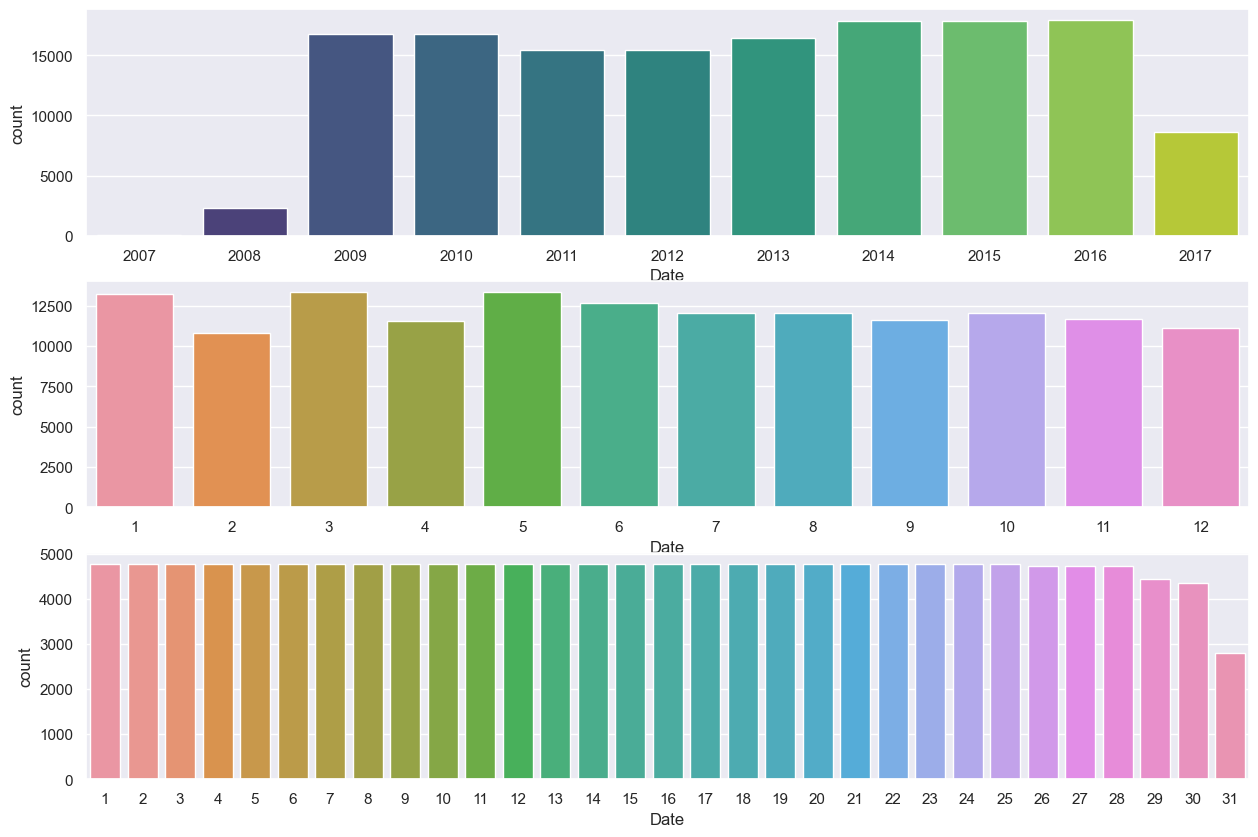

In [348]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
sns.countplot(ax=axes[0], x=pd.to_datetime(df.Date).dt.year, palette="viridis")
sns.countplot(ax=axes[1], x=pd.to_datetime(df.Date).dt.month)
sns.countplot(ax=axes[2], x=pd.to_datetime(df.Date).dt.day)
plt.show()

**Observaciones:**
* La variable Date la podemos descomponer en año, mes y día, es muy probable que solo nos interese estudiar solo la probabilidad de lluvia en cada uno de los meses.
* La distribución de datos de los años es bastante uniforme, salvo por el los dos primeros y el ultimo año que hay menos datos.
* La distribución del datos en los meses y días es uniforme.
* La variable Date nos puede traer un problema de alta cardinalidad, debemos evaluar la influencia del año y el mes para poder determinar si conviene o no incluir de forma separa mes y año.

### Location:

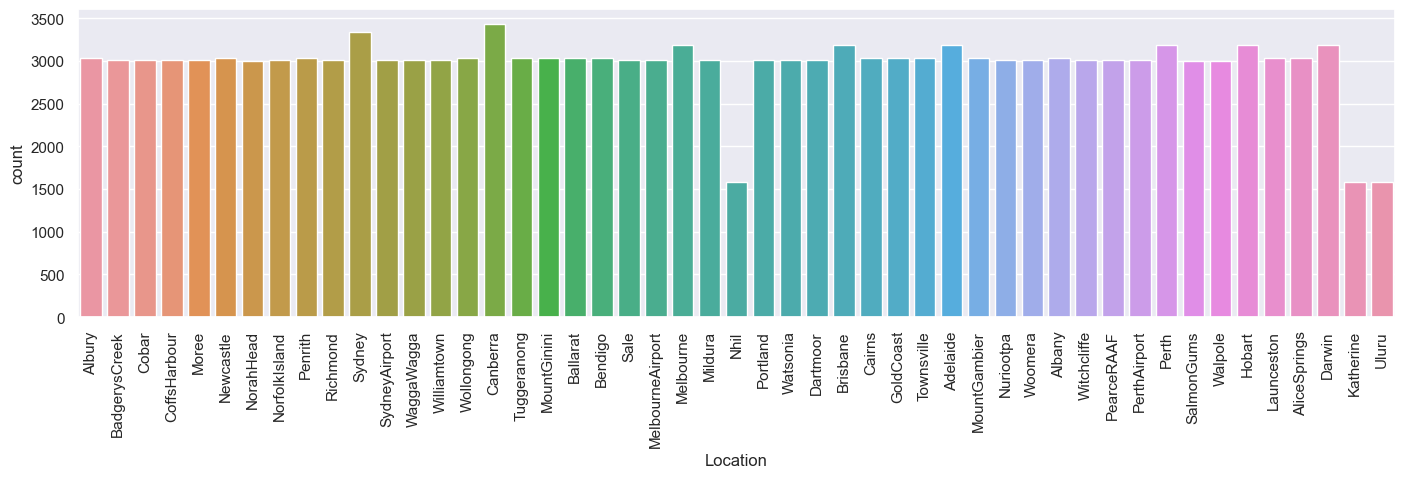

In [346]:
figure(figsize=(17,4))
plt.xticks(rotation=90)
sns.countplot(x=df['Location'])
plt.show()

**Observaciones:**
* La variable Location posee 49 caegórias. Esta variable presenta una cardinalidad alta.
* Se observa que la distribución de los datos es uniforme para todas las locaciones.

### Dirección de viento:

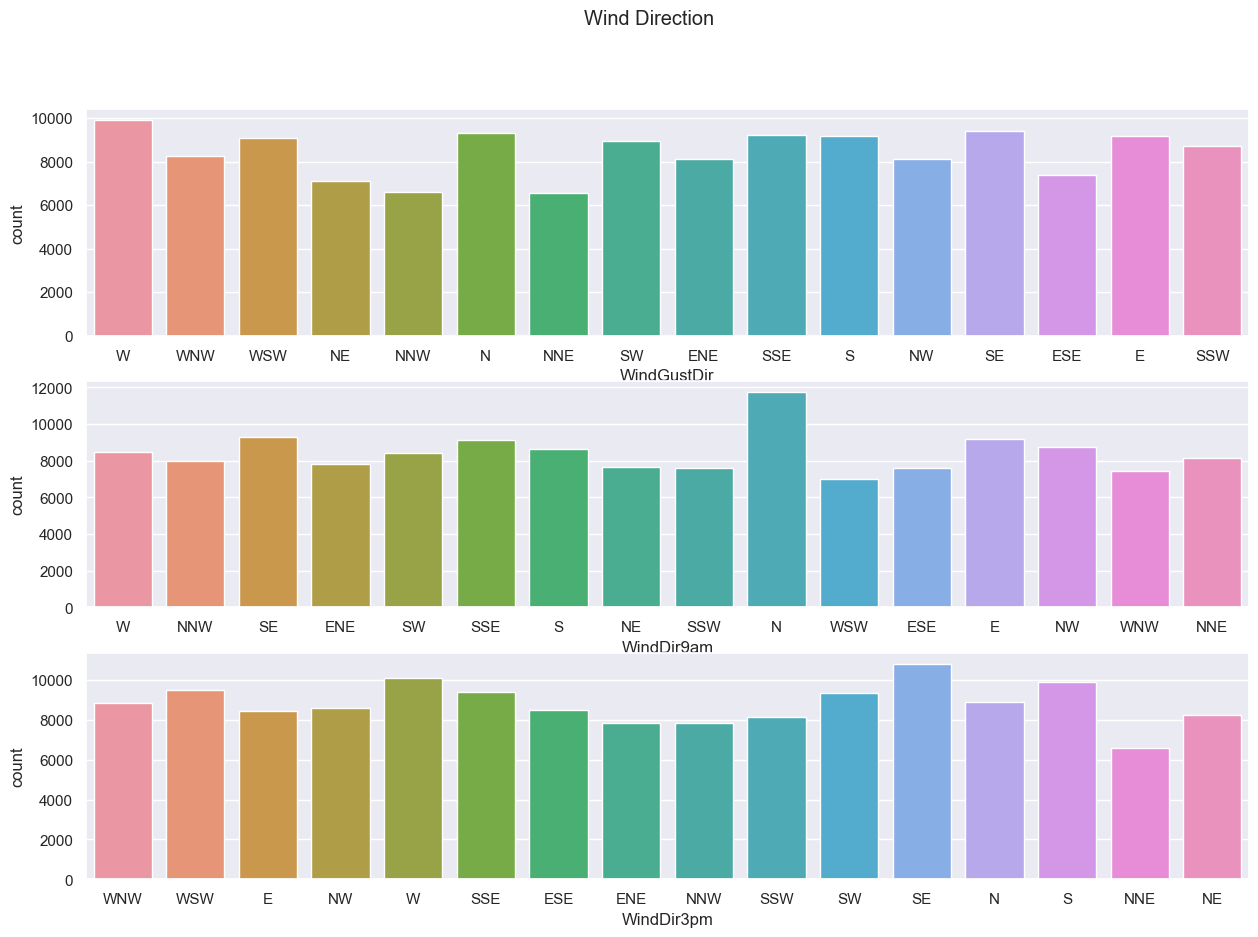

In [347]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('Wind Direction')
sns.countplot(ax=axes[0], x=df['WindGustDir'])
sns.countplot(ax=axes[1], x=df['WindDir9am'])
sns.countplot(ax=axes[2], x=df['WindDir3pm'])
plt.show()

**Observaciones:**
* Las variables de dirección del viento poseen 17 categórias que representan diferentes direcciones en el sistema de coordenadas cartesiano, podemos pensar en agrupar estas 17 variables en solo 4 principales (N, S, E, W).
* Se observa que la dirección del viento a las 9:00 am es principalmente desde el norte y a las 3:00 pm del sureste.

### Cloud:
La variable Cloud solo posee 10 categórias correspondientes a la escala Octa utilizada para medir la nubosidad, en la cual 0 representa totalmente despejado y 9 totalmente nublado:

* 0 oktas represents the complete absence of cloud
* 1 okta represents a cloud amount of 1 eighth or less, but not zero
* 7 oktas represents a cloud amount of 7 eighths or more, but not full cloud cover
* 8 oktas represents full cloud cover with no breaks
* 9 oktas represents sky obscured by fog or other meteorological phenomena

https://es.wikipedia.org/wiki/Octa

In [349]:
df['Cloud9am'].value_counts(), df['Cloud3pm'].value_counts()

(7.0    19972
 1.0    15687
 8.0    14697
 0.0     8642
 6.0     8171
 2.0     6500
 3.0     5914
 5.0     5567
 4.0     4420
 9.0        2
 Name: Cloud9am, dtype: int64,
 7.0    18229
 1.0    14976
 8.0    12660
 6.0     8978
 2.0     7226
 3.0     6921
 5.0     6815
 4.0     5322
 0.0     4974
 9.0        1
 Name: Cloud3pm, dtype: int64)

**Observaciones:**
* Existen 10 categórias de nubosidad.
* Existen muy pocos datos para la categória 9 de nubosidad.

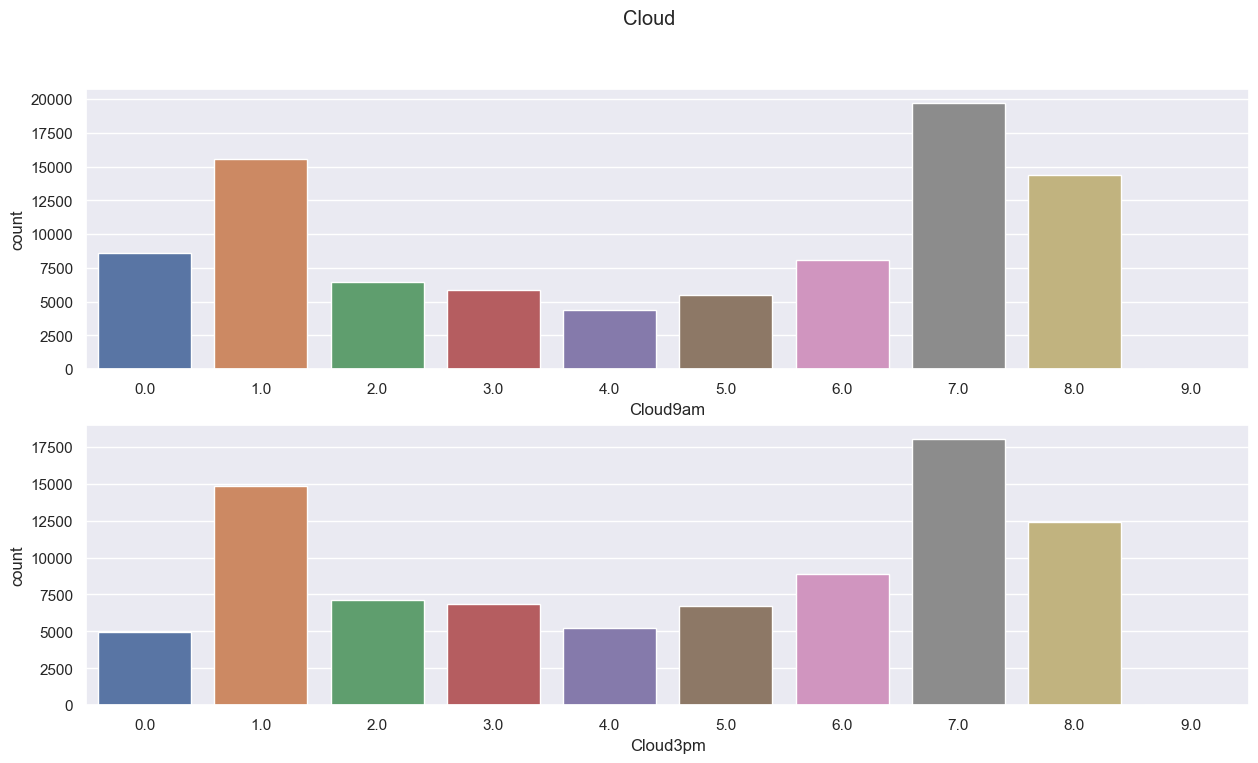

In [398]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
fig.suptitle('Cloud')
sns.countplot(ax=axes[0], x=df['Cloud9am'])
sns.countplot(ax=axes[1], x=df['Cloud3pm'])
plt.show()

### RainToday

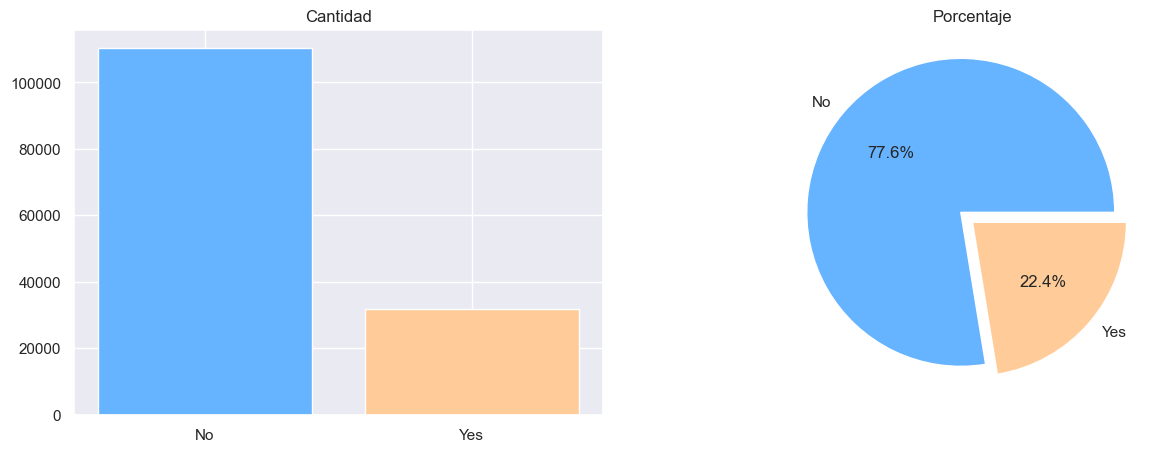

In [351]:
raintoday = df['RainToday'].value_counts()
raintoday_df = raintoday.to_frame().reset_index()
raintoday_df.columns = ["RainToday","porcentaje"]

fig = plt.figure(figsize=(15,5))

ax1=plt.subplot(121)
ax1.bar(raintoday_df["RainToday"], raintoday_df["porcentaje"], color=['#66b3ff','#ffcc99'])
ax1.set_title('Cantidad')

ax1=plt.subplot(122)
ax1.pie(raintoday.values/ len(df) * 100, explode=(0.1, 0),labels=raintoday.index, autopct='%1.1f%%', colors=['#66b3ff','#ffcc99'])
ax1.set_title('Porcentaje')
plt.show()

**Observaciones:**
* Se observa que el volumen de lluvía por año es bastante uniforme.
* Se observa que hay un relación significativa entre el mes y el volumen de lluvía promedio. Por ejemplo, el mes de febrero hay mayor cantidad de precipitación promedio.

## Análisis de correlación entre las variables de entrada y la variable de salida:

### Temperaturas vs RainTomorrow:

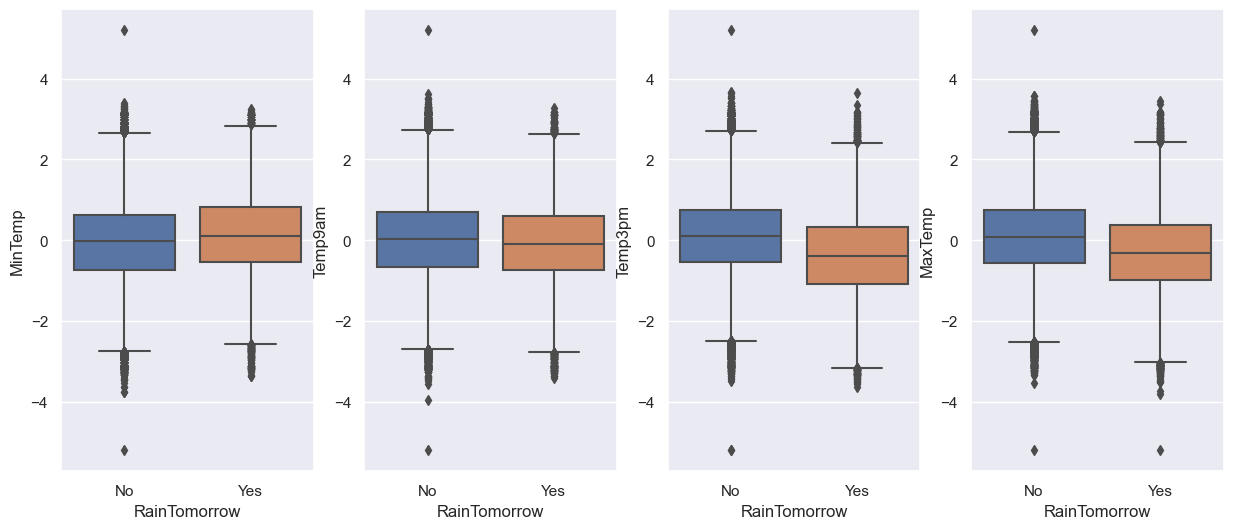

In [400]:
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)

df_aux = pd.DataFrame.copy(df[["MinTemp", "Temp9am", "Temp3pm", "MaxTemp", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
data = df_aux[["MinTemp", "Temp9am", "Temp3pm", "MaxTemp"]].values
data = qt.fit_transform(data)
df_aux["MinTemp"] = data[:,0]
df_aux["Temp9am"] = data[:,1]
df_aux["Temp3pm"] = data[:,2]
df_aux["MaxTemp"] = data[:,3]

fig, axes = plt.subplots(1, 4, figsize=(15, 6))
sns.boxplot(x="RainTomorrow", y='MinTemp', data=df_aux, ax=axes[0])
sns.boxplot(x="RainTomorrow", y='Temp9am', data=df_aux, ax=axes[1])
sns.boxplot(x="RainTomorrow", y='Temp3pm', data=df_aux, ax=axes[2])
sns.boxplot(x="RainTomorrow", y='MaxTemp', data=df_aux, ax=axes[3])
plt.show()

**Se observa que a las variables Temp3pm y MaxTemp son las que mayor efecto tienen sobre la variable de salida RainTomorrow**

### Velocidad del viento vs RainTomorrow:     

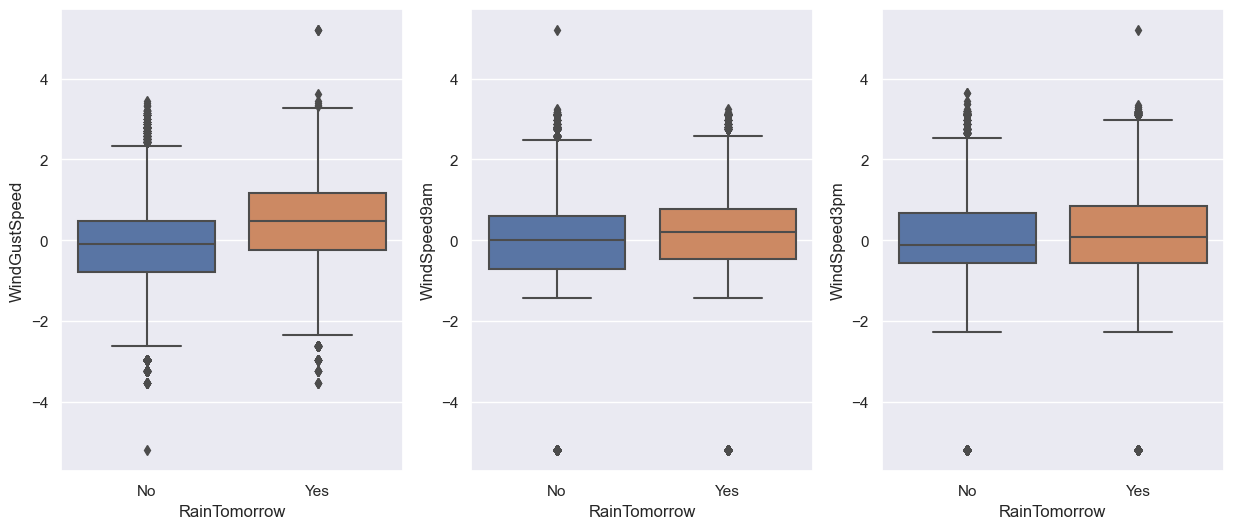

In [217]:
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)

df_aux = pd.DataFrame.copy(df[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
data = df_aux[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]].values
data = qt.fit_transform(data)
df_aux["WindGustSpeed"] = data[:,0]
df_aux["WindSpeed9am"] = data[:,1]
df_aux["WindSpeed3pm"] = data[:,2]

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.boxplot(x="RainTomorrow", y='WindGustSpeed', data=df_aux, ax=axes[0])
sns.boxplot(x="RainTomorrow", y='WindSpeed9am', data=df_aux, ax=axes[1])
sns.boxplot(x="RainTomorrow", y='WindSpeed3pm', data=df_aux, ax=axes[2])

plt.show()

* Se observa que a la variables WindGustSpeed es la que mayor efecto tienen sobre la variable de salida RainTomorrow.
* Se observa muy poca relación entre las variables WindSpeed9am, WindSpeed3pm y la variable de salida RainTomorrow.

### Dirección del viento vs RainTomorrow:

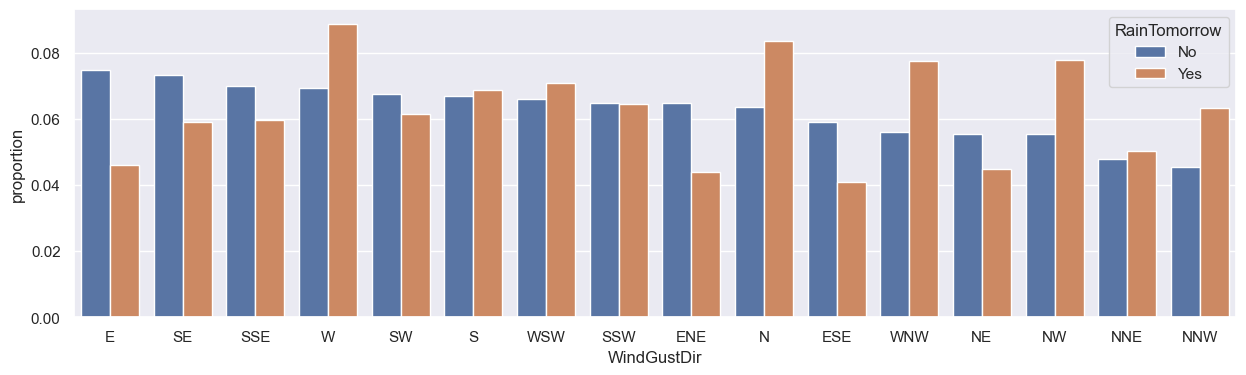

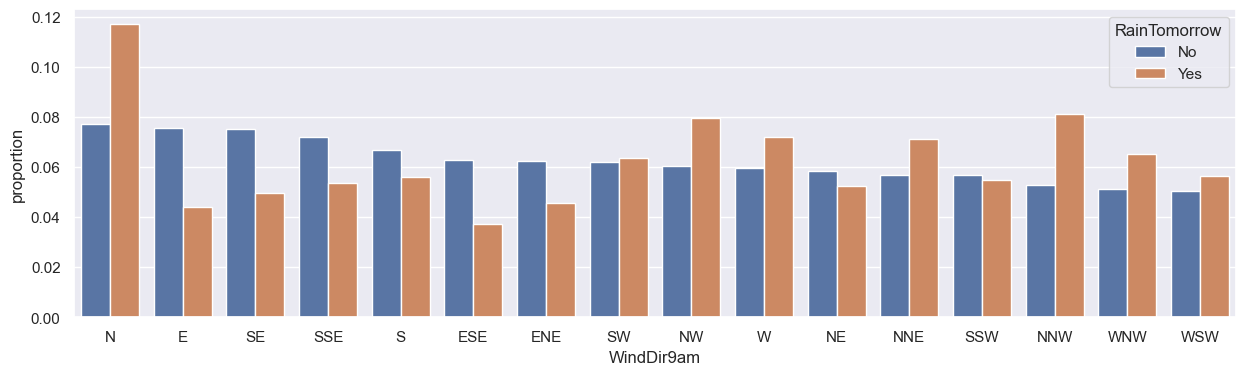

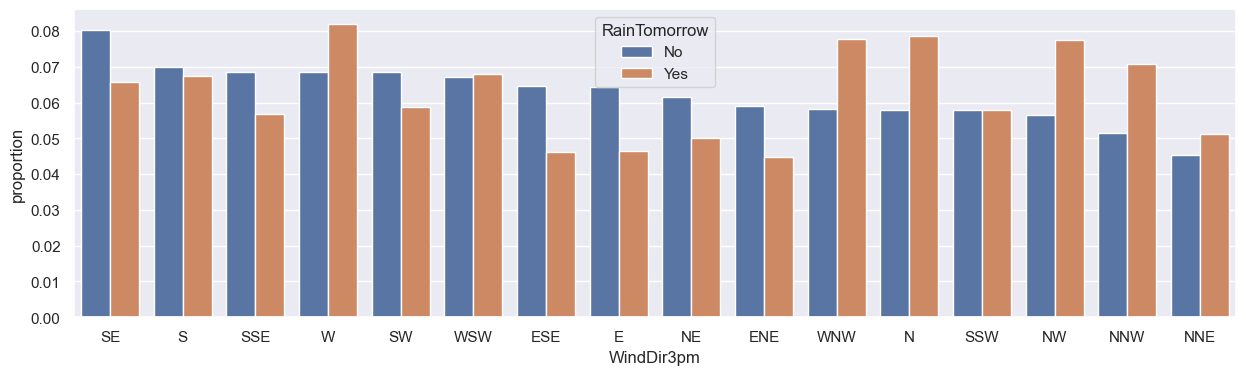

In [79]:
fig, axes = plt.subplots(1, 1, figsize=(15, 4))
x, y, hue = "WindGustDir", "proportion", "RainTomorrow"
df_aux = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index())

ax = sns.barplot(x="WindGustDir", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(15, 4))
x, y, hue = "WindDir9am", "proportion", "RainTomorrow"
df_aux = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index())

ax = sns.barplot(x="WindDir9am", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(15, 4))
x, y, hue = "WindDir3pm", "proportion", "RainTomorrow"
df_aux = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index())

ax = sns.barplot(x="WindDir3pm", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

**Se observa una fuerte relación entre la dirección del viento y la probabilidad de lluvia. Cuando los vientos provienten entre el norte y el oeste (N, NNW, NW, WNW y W) existe una mayor probabilidad de lluvia.**

### Presión atmosférica y humedad relativa vs Rain Tomorrow:

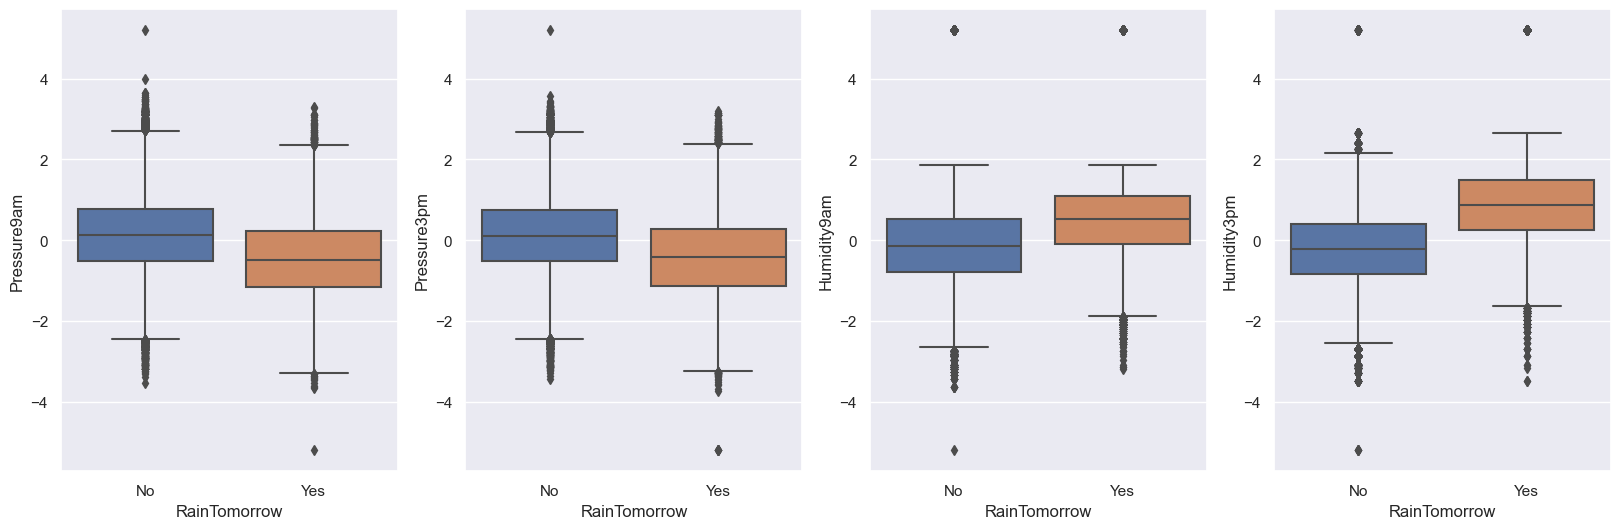

In [216]:
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)

df_aux = pd.DataFrame.copy(df[["Pressure9am", "Pressure3pm", "Humidity9am", "Humidity3pm", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
data = df_aux[["Pressure9am", "Pressure3pm", "Humidity9am", "Humidity3pm"]].values
data = qt.fit_transform(data)
df_aux["Pressure9am"] = data[:,0]
df_aux["Pressure3pm"] = data[:,1]
df_aux["Humidity9am"] = data[:,2]
df_aux["Humidity3pm"] = data[:,3]

fig, axes = plt.subplots(1, 4, figsize=(20, 6))
sns.boxplot(x="RainTomorrow", y='Pressure9am', data=df_aux, ax=axes[0])
sns.boxplot(x="RainTomorrow", y='Pressure3pm', data=df_aux, ax=axes[1])
sns.boxplot(x="RainTomorrow", y='Humidity9am', data=df_aux, ax=axes[2])
sns.boxplot(x="RainTomorrow", y='Humidity3pm', data=df_aux, ax=axes[3])
plt.show()

* Se observa que existe una relación entre las Pressure y la variable salida, menor presión atmoférica
* Se observa una fuerte relación en tre las variables Humidity y la variable de salida.

### RainFall Evaporation y Sunshine vs Rain Tomorrow:

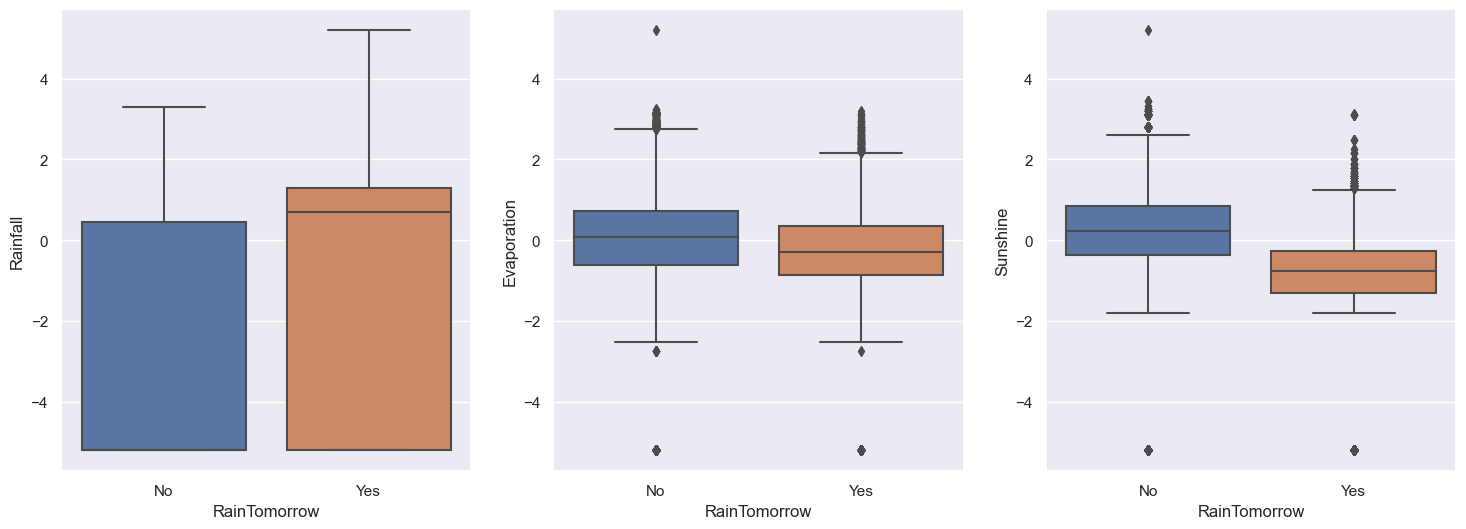

In [220]:
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)

df_aux = pd.DataFrame.copy(df[["Rainfall", "Evaporation", "Sunshine", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
data = df_aux[["Rainfall", "Evaporation", "Sunshine"]].values
data = qt.fit_transform(data)
df_aux["Rainfall"] = data[:,0]
df_aux["Evaporation"] = data[:,1]
df_aux["Sunshine"] = data[:,2]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x="RainTomorrow", y='Rainfall', data=df_aux, ax=axes[0])
sns.boxplot(x="RainTomorrow", y='Evaporation', data=df_aux, ax=axes[1])
sns.boxplot(x="RainTomorrow", y='Sunshine', data=df_aux, ax=axes[2])
plt.show()

### Date vs Rain Tomorrow:
La idea es analizar los meses más propensos a lluvia.

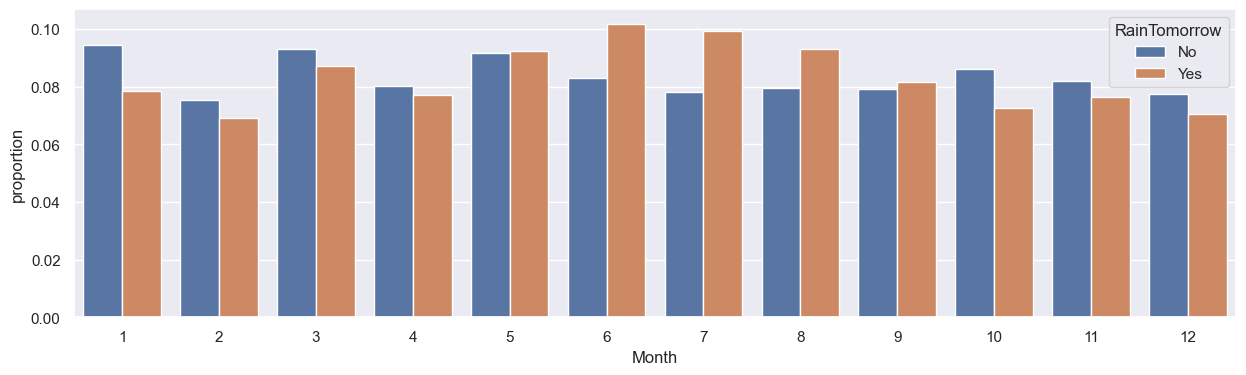

In [231]:
fig, axes = plt.subplots(1, 1, figsize=(15, 4))
df_aux = pd.DataFrame.copy(df[["Date", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["Month"] = pd.to_datetime(df.Date).dt.month

x, y, hue = "Month", "proportion", "RainTomorrow"

df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="Month", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()


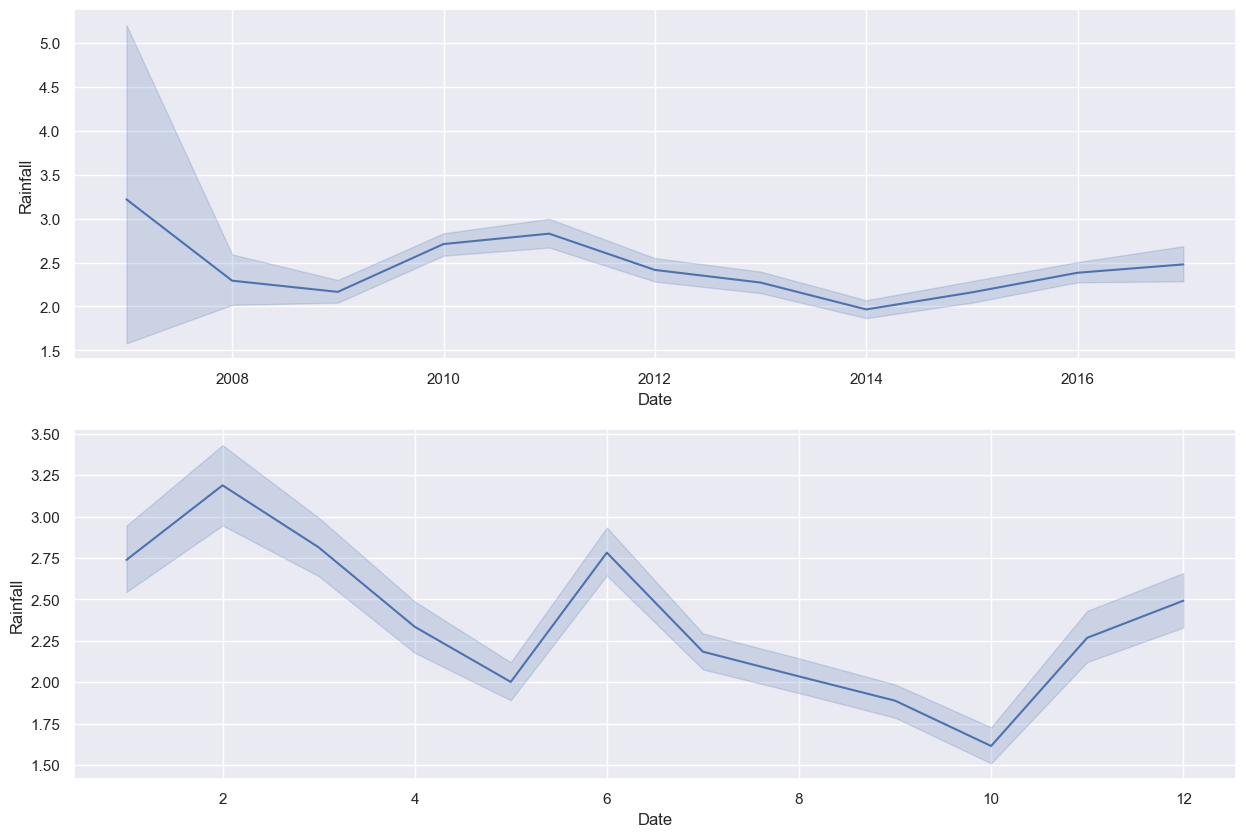

In [240]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(ax=axes[0], x=pd.to_datetime(df.Date).dt.year, y=df.Rainfall)
sns.lineplot(ax=axes[1], x=pd.to_datetime(df.Date).dt.month, y=df.Rainfall)
plt.show()

* Se observa que los meses con mayor número de días fueron los meses de Junio, Julio y Agosto.

### Location vs Rain Tomorrow:

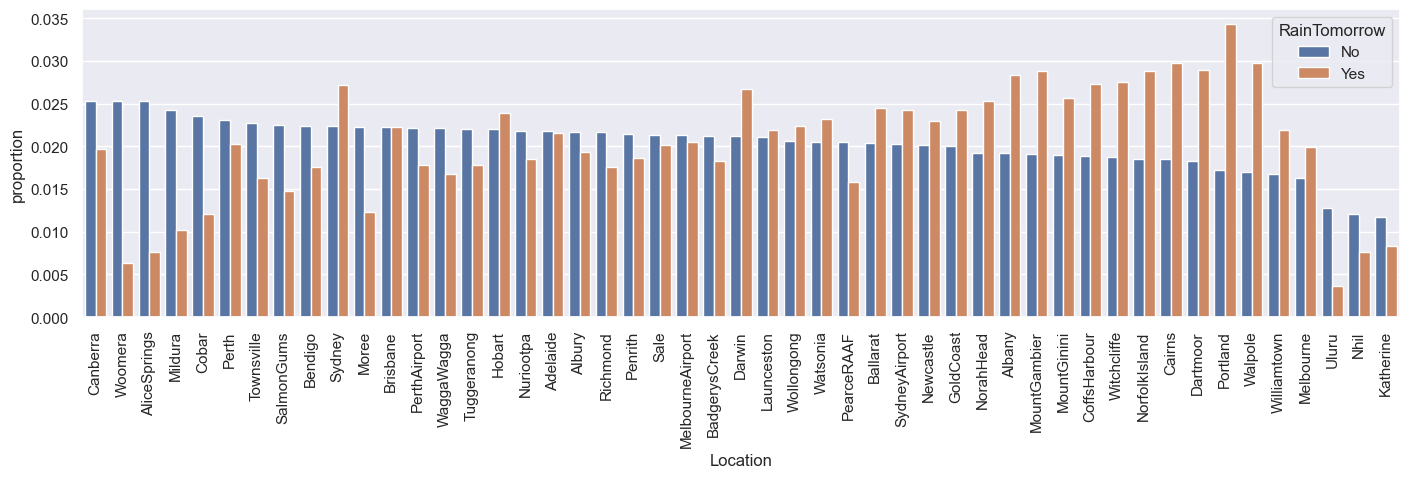

In [251]:
figure(figsize=(17,4))
plt.xticks(rotation=90)
df_aux = pd.DataFrame.copy(df[["Location", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["Location"] = df_aux[["Location"]].values
x, y, hue = "Location", "proportion", "RainTomorrow"

df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="Location", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

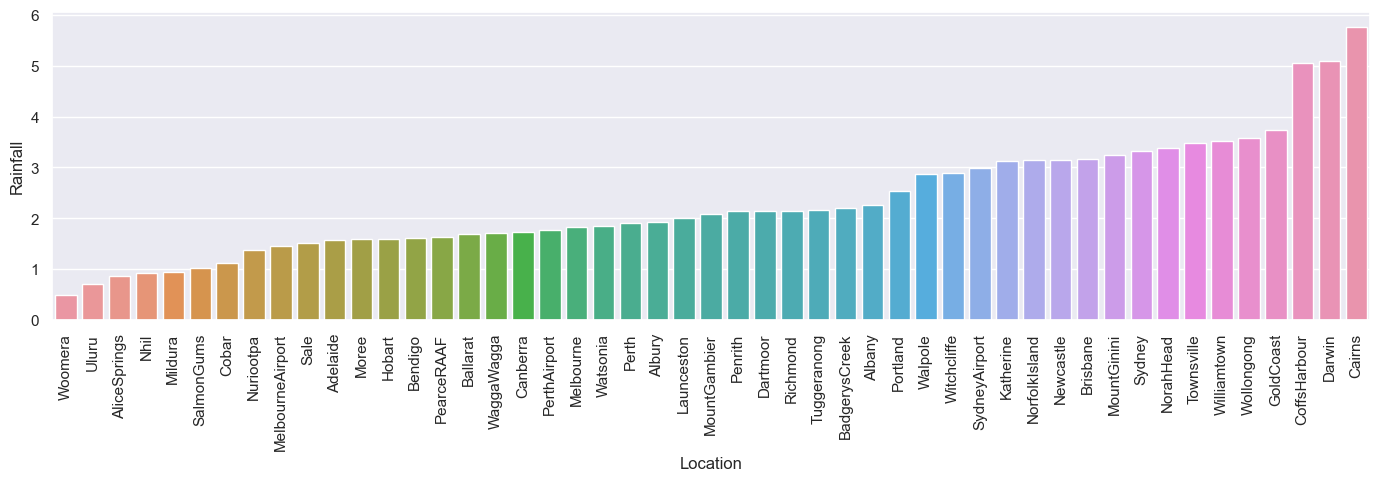

In [416]:
# Media del volumen de lluvia por localidades
figure(figsize=(17,4))
plt.xticks(rotation=90)
sns.barplot(x="Location", y="Rainfall", data=df.groupby(["Location"]).mean().reset_index().sort_values(by=["Rainfall"]))
plt.show()



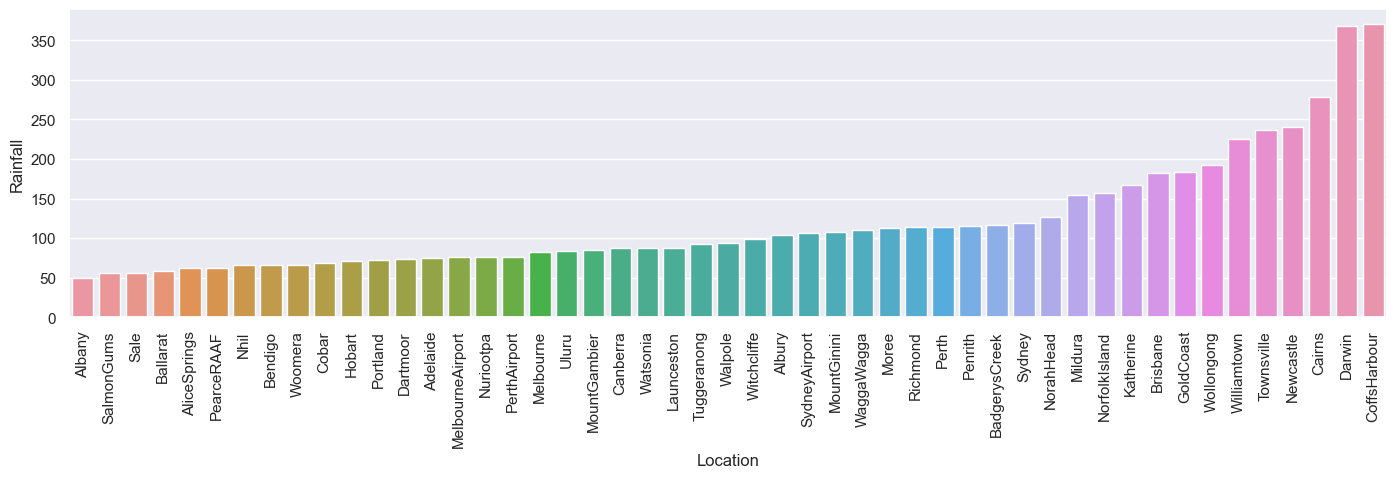

In [433]:
# Máximo volumen de lluvia por localidades
figure(figsize=(17,4))
plt.xticks(rotation=90)
sns.barplot(x="Location", y="Rainfall", data=pd.DataFrame(df.groupby(['Location'], sort=False)['Rainfall'].max().sort_values()).reset_index())
plt.show()



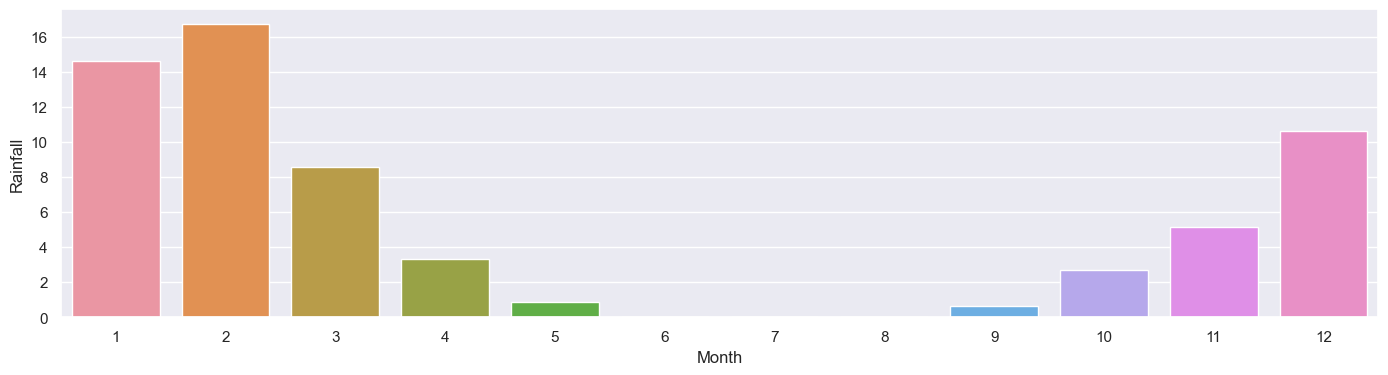

In [461]:
df["Month"] = pd.to_datetime(df.Date).dt.month
figure(figsize=(17,4))
df_aux = pd.DataFrame(df[df["Location"] == "Darwin" ].groupby(['Location', "Month"], sort=False)['Rainfall'].mean().sort_values()).reset_index()
sns.barplot(x="Month", y="Rainfall",data=df_aux )
plt.show()

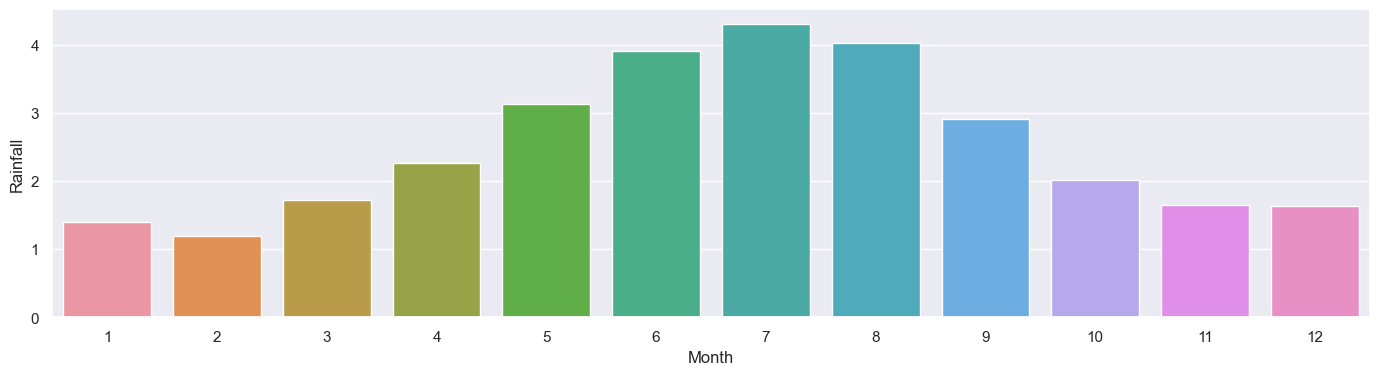

In [462]:
figure(figsize=(17,4))
df_aux = pd.DataFrame(df[df["Location"] == "Portland" ].groupby(['Location', "Month"], sort=False)['Rainfall'].mean().sort_values()).reset_index()
sns.barplot(x="Month", y="Rainfall",data=df_aux )
plt.show()

**En la localidad de Darwin los meses mas secos son de mayo a septiembre mientras que la localidad de Portland dichos meses corresponden a los meses con mayor cantidad de lluvia. Por lo cual podemos afirmar que existe una fuerte relación entre la localidad y el mes.**

### Nubosidad vs Rain Tomorrow:

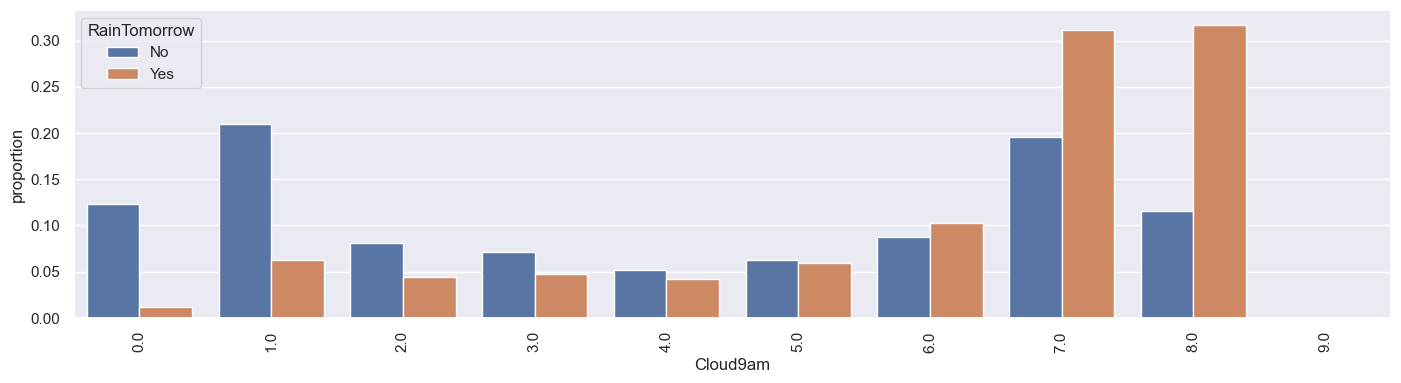

In [293]:
figure(figsize=(17,4))
plt.xticks(rotation=90)

df_aux = pd.DataFrame.copy(df[["Cloud9am", "Cloud3pm", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["Cloud9am"] = df_aux[["Cloud9am"]].values
x, y, hue = "Cloud9am", "proportion", "RainTomorrow"
df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="Cloud9am", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

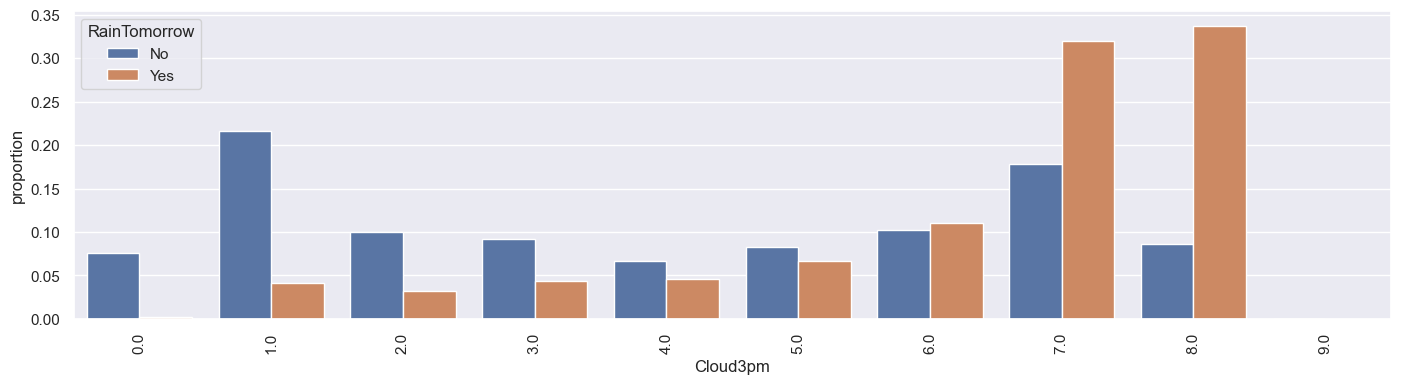

In [294]:
figure(figsize=(17,4))
plt.xticks(rotation=90)

df_aux = pd.DataFrame.copy(df[["Cloud9am", "Cloud3pm", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["Cloud3pm"] = df_aux[["Cloud3pm"]].values
x, y, hue = "Cloud3pm", "proportion", "RainTomorrow"
df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="Cloud3pm", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

* Se observa una relación marcada entre la nubosidad y la probabilidad de lluvía.

### RainToday vs Rain Tomorrow:

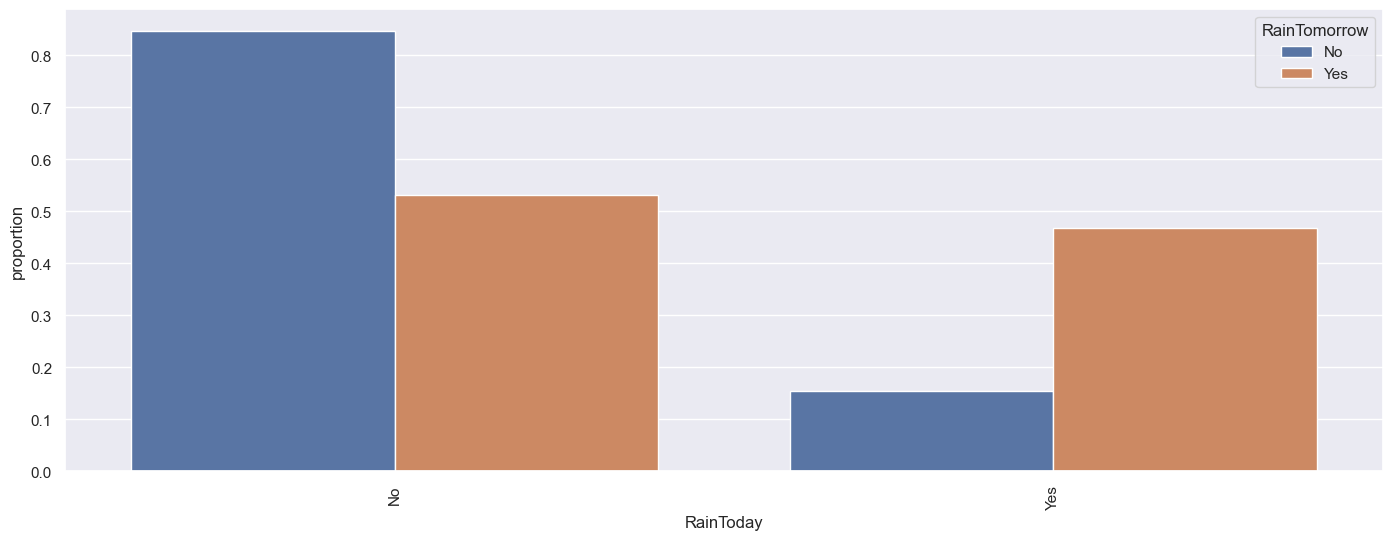

In [296]:
figure(figsize=(17,6))
plt.xticks(rotation=90)

df_aux = pd.DataFrame.copy(df[["RainToday", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["RainToday"] = df_aux[["RainToday"]].values
x, y, hue = "RainToday", "proportion", "RainTomorrow"
df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="RainToday", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

* Existe una marcada relación entre las variables RainToday y RainTomorrow. 

In [474]:
# Kolmogorov-Smirnov Test para determinar relaciones entre variables.
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)

df_aux = pd.DataFrame.copy(df[["Pressure9am", "Pressure3pm", "Humidity9am", "Humidity3pm", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
data = df_aux[["Pressure9am", "Pressure3pm", "Humidity9am", "Humidity3pm"]].values
data = qt.fit_transform(data)
df_aux["Pressure9am"] = data[:,0]
df_aux["Pressure3pm"] = data[:,1]
df_aux["Humidity9am"] = data[:,2]
df_aux["Humidity3pm"] = data[:,3]


x = df_aux[df_aux["RainTomorrow"] == "No"].Humidity3pm
y = df_aux[df_aux["RainTomorrow"] == "Yes"].Humidity3pm

ks_2samp(x, y)

KstestResult(statistic=0.4432900403850357, pvalue=0.0)

## Análisis de variable categórica de salida:

### RainTomorrow:

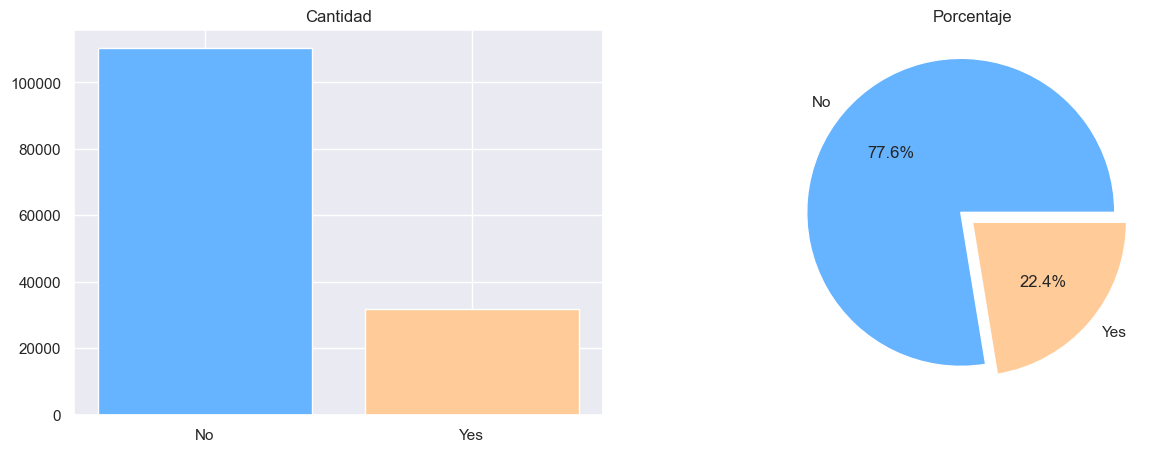

In [221]:
raintomorrow = df['RainTomorrow'].value_counts()
raintomorrow_df = raintomorrow.to_frame().reset_index()
raintomorrow_df.columns = ["RainTomorrow","porcentaje"]

fig = plt.figure(figsize=(15,5))

ax1=plt.subplot(121)
ax1.bar(raintomorrow_df["RainTomorrow"], raintomorrow_df["porcentaje"], color=['#66b3ff','#ffcc99'])
ax1.set_title('Cantidad')

ax1=plt.subplot(122)
ax1.pie(raintomorrow.values/ len(df) * 100, explode=(0.1, 0),labels=raintomorrow.index, autopct='%1.1f%%', colors=['#66b3ff','#ffcc99'])
ax1.set_title('Porcentaje')
raintomorrow_df
plt.show()

**Observaciones:**
* Las clases se encuentran desbalanceadas.

# 3. Limpieza y preparación de datos / ingeniería de features

## Encoding variables categóricas:

## Análisis de faltantes:

In [297]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**Se observa que hay 3267 registros en null en la variable de salida.**

In [306]:
# Eliminamos los registros cuyo valor RainTomorrow es null.
df = df[~df.RainTomorrow.isnull()]

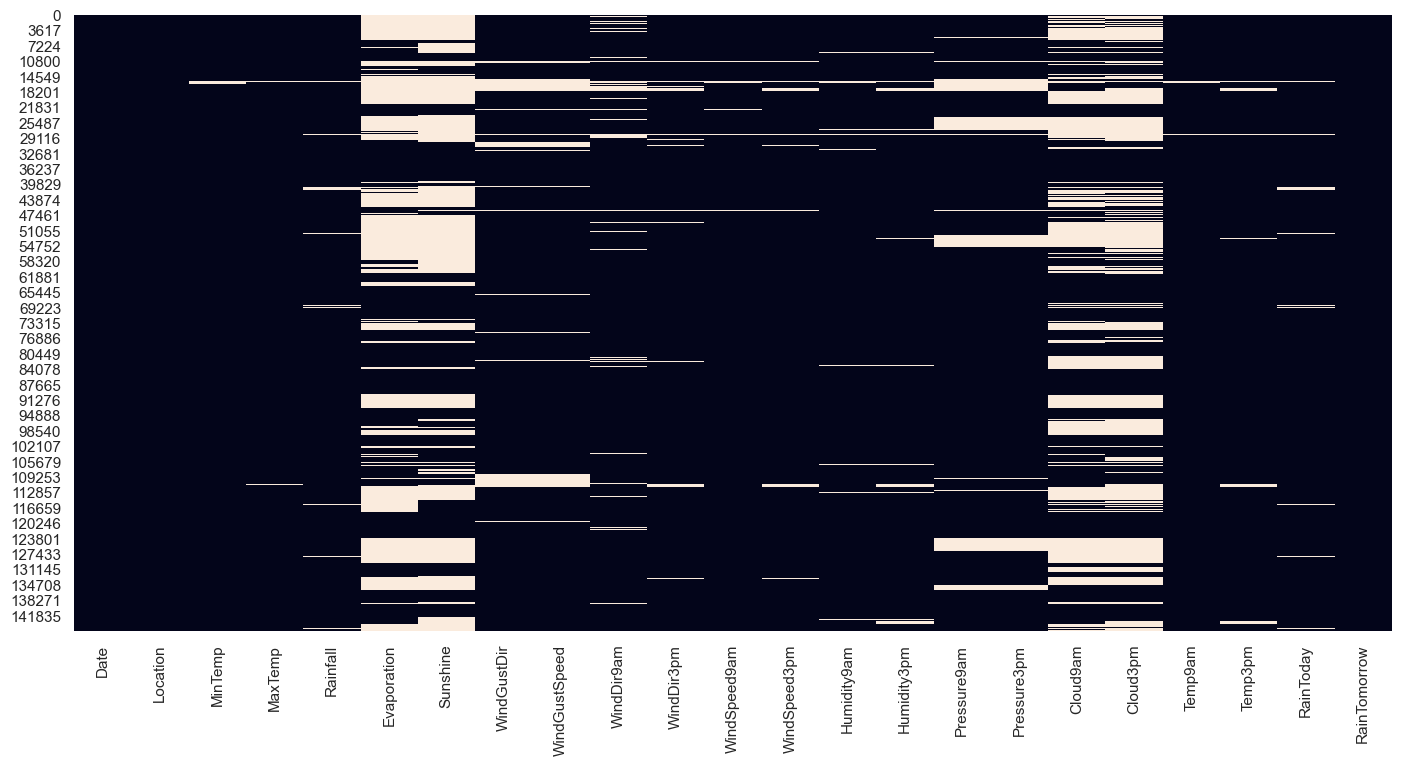

In [307]:
figure(figsize=(17,8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

**Observaciones:**
* Se observa un gran número de faltantes en las columnas Evaporation, Sunshine, Cloud9am, Cloud3pm.
* Se observa que los faltantes coinciden en esas columnas, es probable que sean Missing not at Random ya que estos datos no hayan estado disponibles para determinadas localidades.

## Temperatura:

In [309]:
df[["MinTemp", "Temp9am", "MaxTemp", "Temp3pm"]].isnull().sum()

MinTemp    1485
Temp9am    1767
MaxTemp    1261
Temp3pm    3609
dtype: int64

### Sunshine:

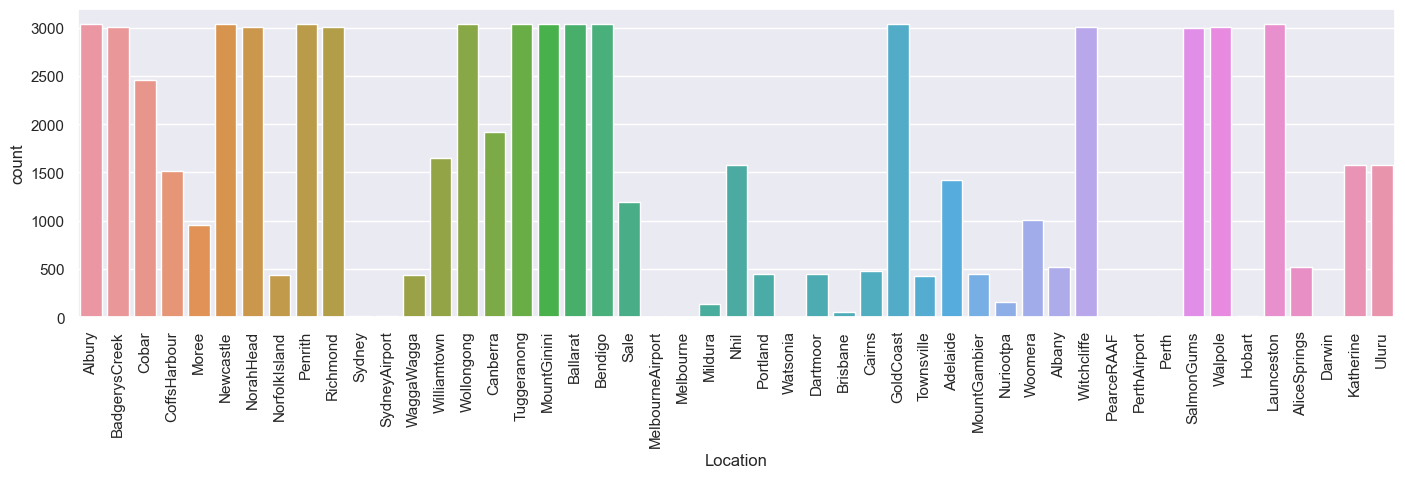

In [297]:
figure(figsize=(17,4))
plt.xticks(rotation=90)
sns.countplot(x=df[df['Sunshine'].isnull()]['Location'])
plt.show()

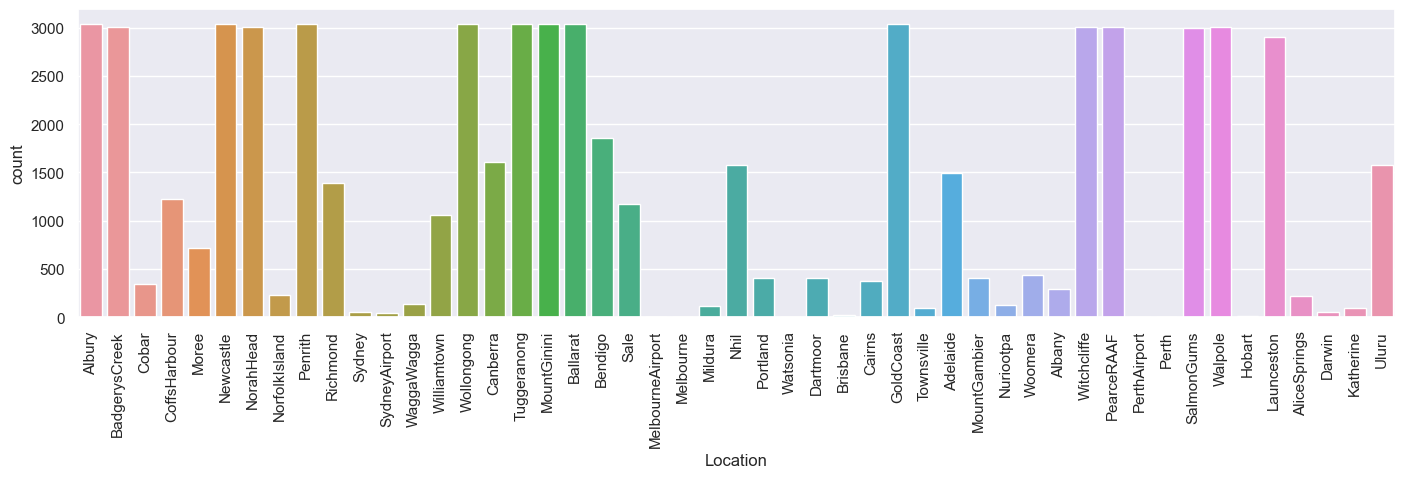

In [298]:
figure(figsize=(17,4))
plt.xticks(rotation=90)
sns.countplot(x=df[df['Evaporation'].isnull()]['Location'])
plt.show()

**Observaciones:**
* Se observa que en algunas localidades no se realizaron mediciones de la variable Sunshine y Evaporation.

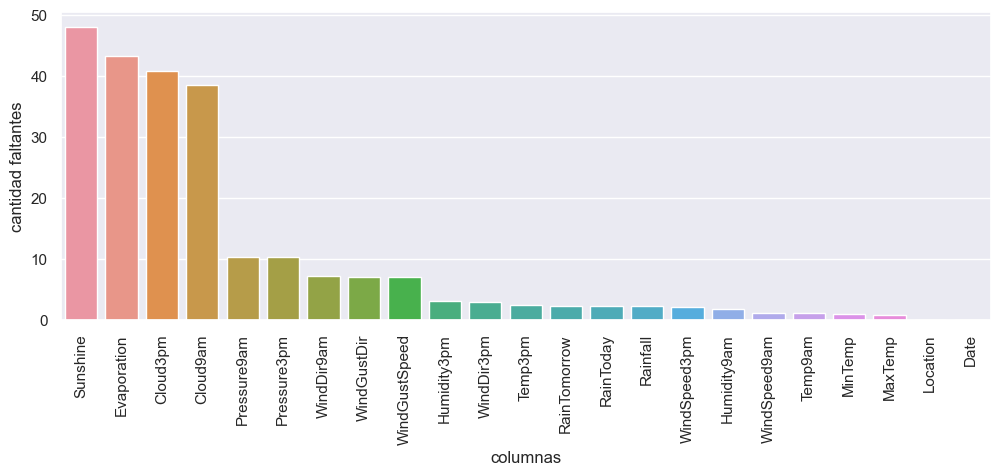

In [299]:
# Verificamos valores faltantes
faltantes = np.sum(df.isnull()/len(df)*100).sort_values(ascending=False)
faltantes_df = faltantes.to_frame().reset_index()
faltantes_df.columns = ["columnas","cantidad faltantes"]
figure(figsize=(12,4))
plt.xticks(rotation=90)
ax = sns.barplot(x="columnas", y="cantidad faltantes", data=faltantes_df)
plt.show()

### Observaciones:
* La columna "Sunshine" es la características que posee mayor cantidad de faltantes.
* Las columnas "Sunshine", "Evaporation", "Cloud3pm" y "Cloud9am" son las que mayor número de faltantes posee.
* El resto de las columnas posee un número de faltantes por debajo al 10%.
* Las columnas "Dates" y "Location" no poseen nulos.
* La variable "RainToday" posse 3261 valores nulos.


### Faltantes:

In [300]:
# Verificamos valores faltantes de las variables categoricas
faltantes_cat = np.sum(df[["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "Date"]].isnull()).sort_values(ascending=False)
faltantes_cat

WindDir9am      10566
WindGustDir     10326
WindDir3pm       4228
RainTomorrow     3267
RainToday        3261
Date                0
Location            0
dtype: int64

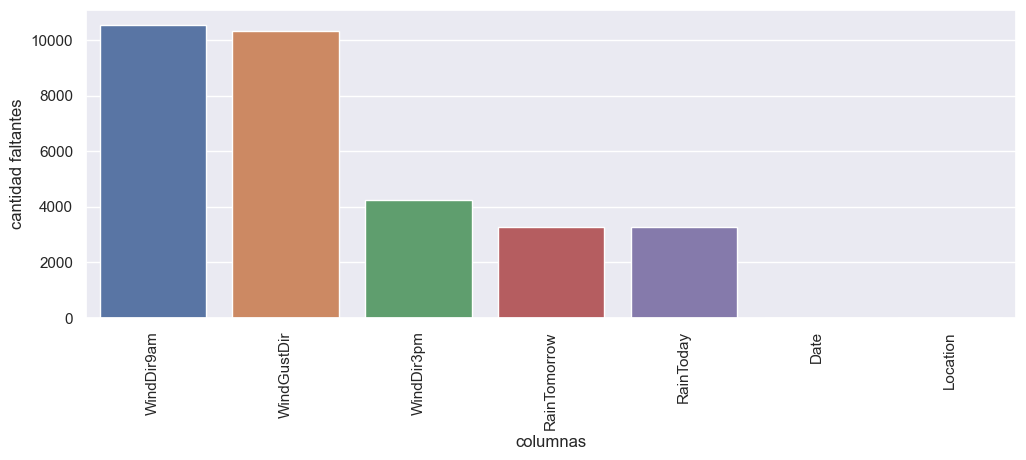

In [301]:
faltantes_cat_df = faltantes_cat.to_frame().reset_index()
faltantes_cat_df.columns = ["columnas","cantidad faltantes"]
figure(figsize=(12,4))
plt.xticks(rotation=90)
ax = sns.barplot(x="columnas", y="cantidad faltantes", data=faltantes_cat_df)
plt.show()

In [309]:
#X = df_aux[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']].values[:, :-1]
X = df_aux[['MaxTemp','Rainfall','Evaporation','Sunshine','Humidity3pm','Pressure3pm','Cloud3pm', "WindGustSpeed"]].values[:, :-1]
y = df_aux.values[:, -1]

KeyError: "None of [Index(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity3pm',\n       'Pressure3pm', 'Cloud3pm', 'WindSpeedGust'],\n      dtype='object')] are in the [columns]"

In [308]:
pipeline = Pipeline(steps=[
    ('Q_transformer', QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)),
    ( 'imputer' ,SimpleImputer()), 
    ( 'lr' , LogisticRegression() )
])

param_grid = {
    "imputer__strategy": ['most_frequent', 'mean','constant','median' ],
    "lr__max_iter": [1000]
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
search = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=cv)
results =search.fit(X,y)

NameError: name 'X' is not defined

In [227]:
print('Mejor Puntaje (Accuracy): %.3f ' % results.best_score_)
print('Mejor parámetro: %s ' % results.best_params_)

Mejor Puntaje (Accuracy): 0.835 
Mejor parámetro: {'imputer__strategy': 'median', 'lr__max_iter': 1000} 


In [ ]:
from sklearn.model_selection import cross_val_score

results=[]
for param in param_grid["imputer__strategy"]:
    pipeline = Pipeline(steps=[
        ( 'imputer' ,SimpleImputer(strategy=param)), 
        ( 'lr' , LogisticRegression(max_iter=1000) )
    ])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring= 'accuracy' , cv=cv, n_jobs=-1)    
    results.append(scores)

In [ ]:
fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,labels=param_grid["imputer__strategy"],showmeans=True)
axes.set_xlabel("Método")
axes.set_ylabel("Accuracy")
axes.set_title("Efecto de métodos de imputación estadística en Regresión Logística");
plt.show()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

results=[]

param_grid = {
    "imputer__n_nearest_features": [None,1,2,3]
}

for param in param_grid["imputer__n_nearest_features"]:
    pipeline = Pipeline(steps=[
        ( 'imputer' ,IterativeImputer(n_nearest_features=param)), 
        ( 'lr' , LogisticRegression(max_iter=1000) )
    ])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    scores = cross_val_score(pipeline, X, y, scoring= 'accuracy' , cv=cv, n_jobs=-1)    
    results.append(scores)
    
fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,labels=
    [x or "None" for x in param_grid["imputer__n_nearest_features"]],showmeans=True)
axes.set_xlabel("n_nearest_features")
axes.set_ylabel("Accuracy")
axes.set_title("MICE (IterativeImputer) en Titanic");   

In [ ]:
plt.show()

In [ ]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
imp = IterativeImputer(estimator=clf, verbose=2, max_iter=1000, tol=1e-6)

In [ ]:
Z = imp.fit_transform(X)

In [ ]:
Z = pd.DataFrame(Z)

In [ ]:
X.loc[0]

In [ ]:
indice = X.index

In [ ]:
indice.get_loc(0)

In [ ]:
X.iloc[0]

In [ ]:
Z.iloc[0]

In [ ]:
from sklearn import linear_model
clf = LinearRegression()
imp = IterativeImputer(estimator=clf, verbose=2, max_iter=1000, tol=1e-6)

In [ ]:
G = imp.fit_transform(X)

In [ ]:
# Se eliminan los datos faltantes en la variable de salida.
df = df[df['RainTomorrow'].notna()]
df.isnull().sum()

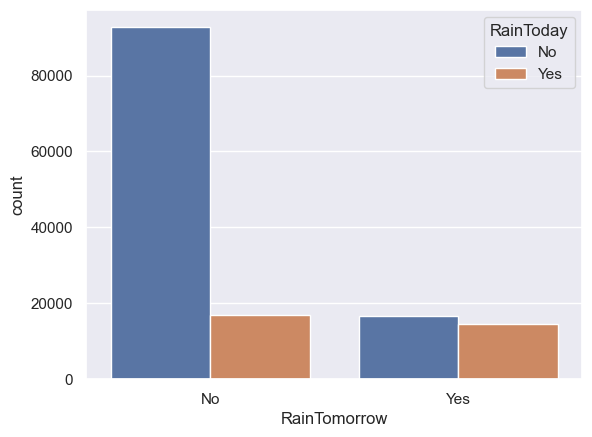

In [319]:
fig.suptitle('Cloud')
sns.countplot(x="RainTomorrow", hue="RainToday", data=df)
plt.show()